In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
import scparadise
import muon as mu
import os
warnings.simplefilter('ignore')
sc.settings.set_figure_params(dpi = 300, dpi_save = 600)

/home/vadim/anaconda3/envs/scrna_rapids/lib/python3.11/site-packages/optuna/study/_optimize.py:20: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from optuna import progress_bar as pbar_module


# Load dataset

In [26]:
# Load normalized integrated data
mdata = mu.read_h5mu('/mnt/c/Users/vadim/Desktop/R/PBMC_ref/CITEseq/3p/mdata_integrated_wnn.h5mu')

In [27]:
# Create test dataset
adata_rna = mdata.mod['rna'][mdata.mod['rna'].obs['orig.ident'].isin(['P5_7', 'P6_7'])].copy()
adata_adt = mdata.mod['adt'][mdata.mod['adt'].obs['orig.ident'].isin(['P5_7', 'P6_7'])].copy()

# scAdam prediction

In [28]:
adata_rna = scparadise.scadam.predict(adata_rna, 
                                      path_model = '/mnt/c/Users/vadim/scRNA/scParadise/scAdam/PBMC/3p/scparadise/model_small_balanced/')

Successfully loaded list of genes used for training model

Successfully loaded dictionary of dataset annotations

Successfully loaded model

Successfully added predicted celltype_l1 and cell type probabilities
Successfully added predicted celltype_l2 and cell type probabilities
Successfully added predicted celltype_l3 and cell type probabilities


In [5]:
# Classification report of celltype_l1
df = scparadise.scnoah.report_classif_full(adata_rna, 
                                           celltype = 'celltype_l1',
                                           pred_celltype= 'pred_celltype_l1',
                                           save_report = True,
                                           ndigits = 3,
                                           report_name = 'report_classif_full_celltype_l1.csv',
                                           save_path = '')
df

Successfully saved report



precision recall/sensitivity specificity f1-score  \
B                      0.998              0.999         1.0    0.999   
DC                     0.951              0.993       0.999    0.971   
Mono                   0.998              0.995       0.999    0.997   
NK                     0.997              0.986       0.999    0.991   
T                      0.992              0.999       0.996    0.995   
other                  0.996              0.967         1.0    0.981   
macro avg              0.989               0.99       0.999    0.989   
weighted avg           0.994              0.994       0.998    0.994   
Accuracy               0.994                                           
Balanced accuracy      0.990                                           

                  geometric mean index balanced accuracy number of cells  
B                          0.999                   0.999            2072  
DC                         0.996                   0.991             409  
Mono                       0.997                   0.994            4664  
NK                         0.993                   0.984            2323  
T                          0.997                   0.995            4905  
other                      0.984                   0.964             492  
macro avg                  0.994                   0.988                  
weighted avg               0.996                   0.992                  
Accuracy                                                                  
Balanced accuracy

In [6]:
# Classification report of celltype_l2
df = scparadise.scnoah.report_classif_full(adata_rna, 
                                           celltype = 'celltype_l2',
                                           pred_celltype= 'pred_celltype_l2',
                                           save_report = True,
                                           ndigits = 3,
                                           report_name = 'report_classif_full_celltype_l2.csv',
                                           save_path = '')
df

Successfully saved report



precision recall/sensitivity specificity f1-score  \
ASDC                   1.000                1.0         1.0      1.0   
CD14 Mono              0.996               0.98       0.999    0.988   
CD16 Mono              0.883              0.981       0.996    0.929   
CD4 T                  0.983              0.974       0.997    0.978   
CD8 T                  0.967               0.97       0.995    0.968   
HSPC                   1.000                1.0         1.0      1.0   
ILC                    0.958                1.0         1.0    0.979   
NK                     0.997              0.954         1.0    0.975   
NK_CD56bright          0.704              0.994       0.995    0.824   
Plasmablast            0.882                1.0         1.0    0.938   
Platelet               0.998              0.963         1.0     0.98   
cDC                    0.936              0.994       0.999    0.964   
other B                0.999              0.999         1.0    0.999   
other T                0.875               0.96       0.995    0.915   
pDC                    0.989                1.0         1.0    0.994   
macro avg              0.944              0.984       0.998    0.962   
weighted avg           0.978              0.976       0.998    0.976   
Accuracy               0.976                                           
Balanced accuracy      0.984                                           

                  geometric mean index balanced accuracy number of cells  
ASDC                         1.0                     1.0              10  
CD14 Mono                  0.989                   0.976            4196  
CD16 Mono                  0.988                   0.975             468  
CD4 T                      0.985                   0.969            2424  
CD8 T                      0.982                   0.962            1936  
HSPC                         1.0                     1.0               8  
ILC                          1.0                     1.0              23  
NK                         0.976                   0.949            2160  
NK_CD56bright              0.995                   0.989             163  
Plasmablast                  1.0                     1.0              15  
Platelet                   0.981                    0.96             461  
cDC                        0.996                   0.992             311  
other B                    0.999                   0.998            2057  
other T                    0.977                   0.951             545  
pDC                          1.0                     1.0              88  
macro avg                  0.991                   0.981                  
weighted avg               0.987                   0.972                  
Accuracy                                                                  
Balanced accuracy

In [7]:
# Classification report of celltype_l3
df = scparadise.scnoah.report_classif_full(adata_rna, 
                                           celltype = 'celltype_l3',
                                           pred_celltype= 'pred_celltype_l3',
                                           save_report = True,
                                           ndigits = 3,
                                           report_name = 'report_classif_full_celltype_l3.csv',
                                           save_path = '')
df

Successfully saved report



precision recall/sensitivity specificity f1-score  \
ASDC                   1.000                1.0         1.0      1.0   
B int κ                0.814              0.903       0.998    0.856   
B int λ                0.828              0.877       0.998    0.852   
B memory κ             0.931              0.798       0.999    0.859   
B memory λ             0.866              0.897       0.998    0.882   
B naive κ              0.929              0.868       0.997    0.897   
B naive λ              0.827              0.899       0.993    0.862   
CD14 Mono              0.996              0.979       0.998    0.988   
CD16 Mono              0.881              0.981       0.996    0.928   
CD4 CTL                0.300              0.818       0.999    0.439   
CD4 T Naive            0.933              0.909       0.995    0.921   
CD4 T Prolif           0.667              0.364         1.0    0.471   
CD4 TCM                0.868              0.709       0.992    0.781   
CD4 TEM                0.509              0.818       0.984    0.628   
CD8 T Naive            0.984              0.924       0.999    0.953   
CD8 T Prolif           0.341                1.0       0.998    0.508   
CD8 TCM                0.697              0.931       0.995    0.797   
CD8 TEM                0.957              0.908       0.997    0.932   
HSPC                   1.000                1.0         1.0      1.0   
ILC                    0.958                1.0         1.0    0.979   
MAIT                   0.884              0.962       0.999    0.922   
NK                     0.996              0.947       0.999    0.971   
NK Prolif              0.811              0.869       0.999    0.839   
NK_CD56bright          0.730              0.994       0.996    0.842   
Plasmablast            0.882                1.0         1.0    0.938   
Platelet               0.998              0.959         1.0    0.978   
Treg                   0.554               0.82       0.998    0.661   
cDC1                   0.941                1.0         1.0     0.97   
cDC2                   0.930               0.99       0.998    0.959   
dnT                    0.294                1.0       0.999    0.455   
gdT                    0.874              0.932       0.996    0.902   
pDC                    0.989                1.0         1.0    0.994   
macro avg              0.818              0.908       0.997    0.843   
weighted avg           0.933              0.922       0.997    0.925   
Accuracy               0.922                                           
Balanced accuracy      0.908                                           

                  geometric mean index balanced accuracy number of cells  
ASDC                         1.0                     1.0              10  
B int κ                    0.949                   0.892             175  
B int λ                    0.935                   0.864             187  
B memory κ                 0.893                   0.781             252  
B memory λ                 0.946                   0.887             195  
B naive κ                   0.93                   0.854             721  
B naive λ                  0.945                   0.885             527  
CD14 Mono                  0.989                   0.976            4196  
CD16 Mono                  0.988                   0.975             468  
CD4 CTL                    0.904                   0.802              11  
CD4 T Naive                0.951                   0.897            1019  
CD4 T Prolif               0.603                    0.34              11  
CD4 TCM                    0.839                   0.684            1036  
CD4 TEM                    0.897                   0.792             297  
CD8 T Naive                0.961                   0.916             800  
CD8 T Prolif               0.999                   0.998              15  
CD8 TCM                    0.962                    0.92             188  
CD8 

In [8]:
# Add prediction status of cells for visualization on UMAP
adata_rna = scparadise.scnoah.pred_status(adata_rna,
                                          celltype='celltype_l1',
                                          pred_celltype='pred_celltype_l1',
                                          key_added='pred_status_l1')
adata_rna = scparadise.scnoah.pred_status(adata_rna,
                                          celltype='celltype_l2',
                                          pred_celltype='pred_celltype_l2',
                                          key_added='pred_status_l2')
adata_rna = scparadise.scnoah.pred_status(adata_rna,
                                          celltype='celltype_l3',
                                          pred_celltype='pred_celltype_l3',
                                          key_added='pred_status_l3')

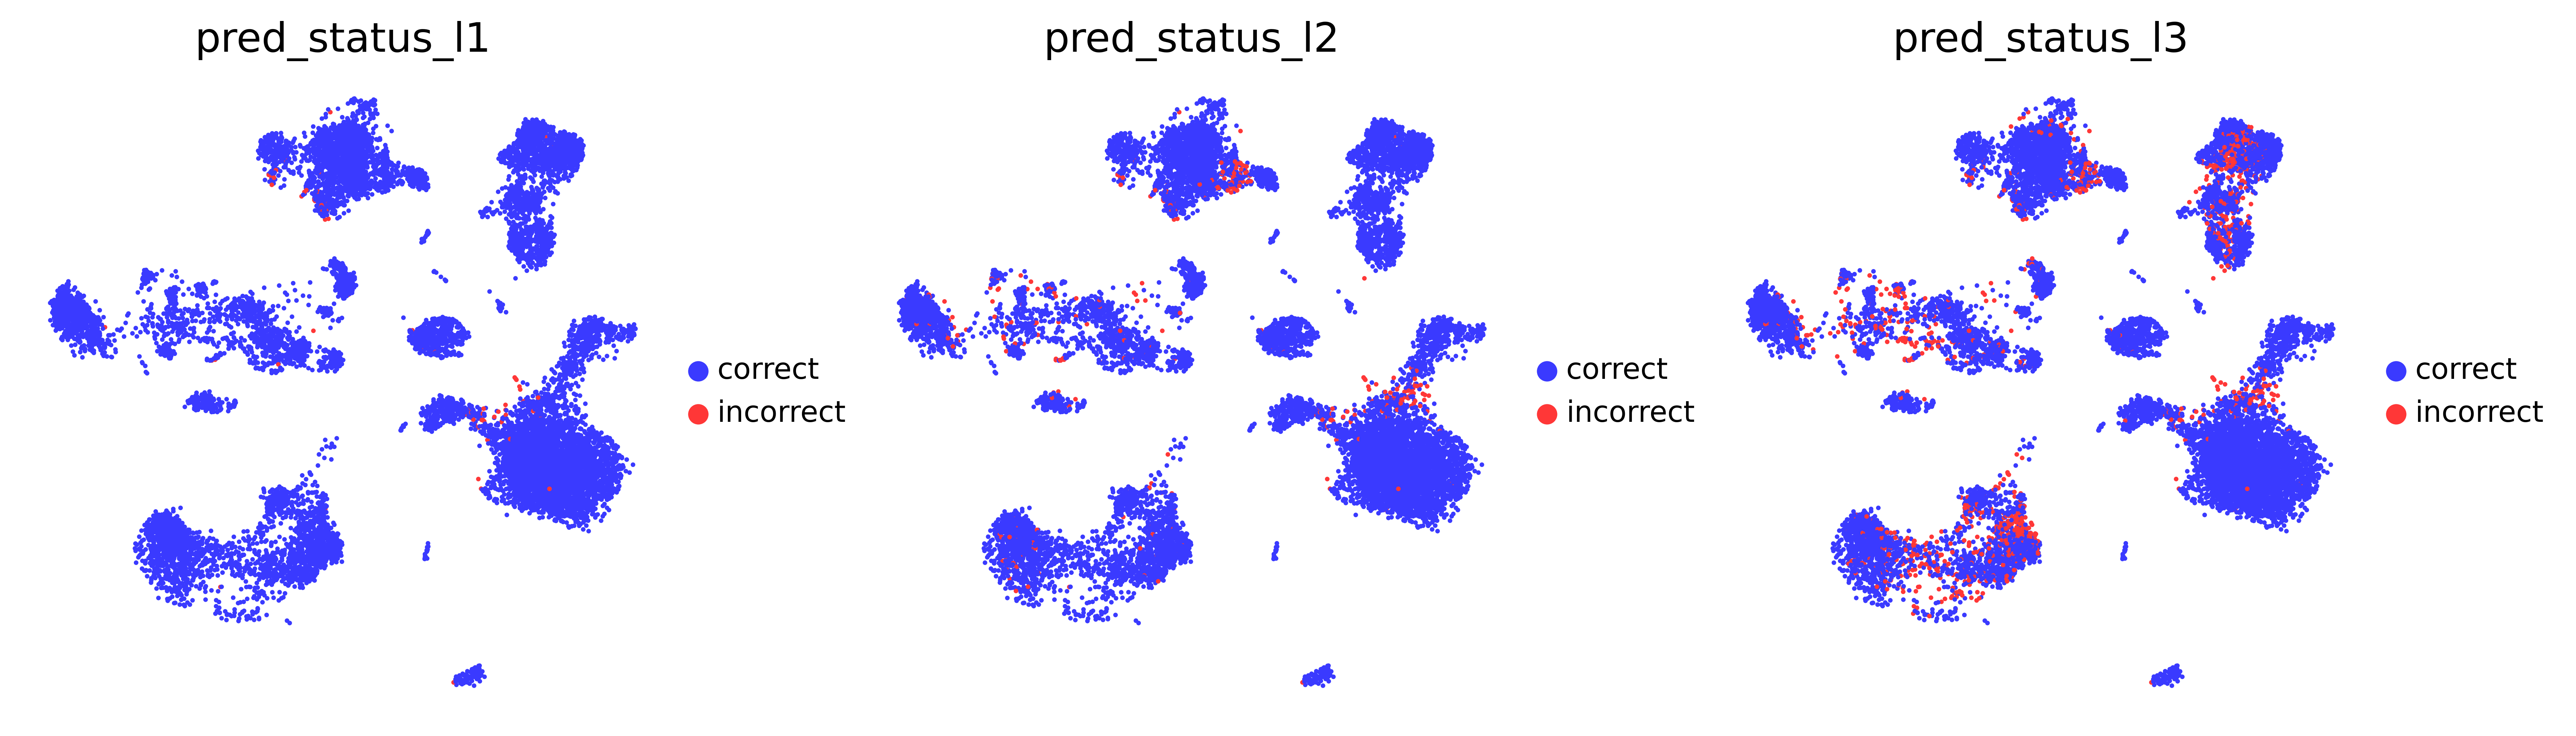

In [9]:
# Visualize prediction status of cells
sc.pl.embedding(adata_rna, 
                color=['pred_status_l1',
                       'pred_status_l2',
                       'pred_status_l3',
                      ], 
                basis = 'X_umap_wnn', 
                frameon = False,
                legend_fontsize = 10, 
                legend_fontoutline = 2, 
                wspace = 0.2,
                size = 10,
                ncols = 3
               )

In [10]:
df = pd.DataFrame()
df['pred_status_l1'] = adata_rna.obs['pred_status_l1'].value_counts()
df['pred_status_l2'] = adata_rna.obs['pred_status_l2'].value_counts()
df['pred_status_l3'] = adata_rna.obs['pred_status_l3'].value_counts()
df.loc['accuracy'] = [round(df['pred_status_l1']['correct']/sum(df['pred_status_l1']), 3),
                      round(df['pred_status_l2']['correct']/sum(df['pred_status_l2']), 3),
                      round(df['pred_status_l3']['correct']/sum(df['pred_status_l3']), 3)]
df

pred_status_l1  pred_status_l2  pred_status_l3
pred_status_l1                                                
correct              14781.000       14504.000       13708.000
incorrect               84.000         361.000        1157.000
accuracy                 0.994           0.976           0.922

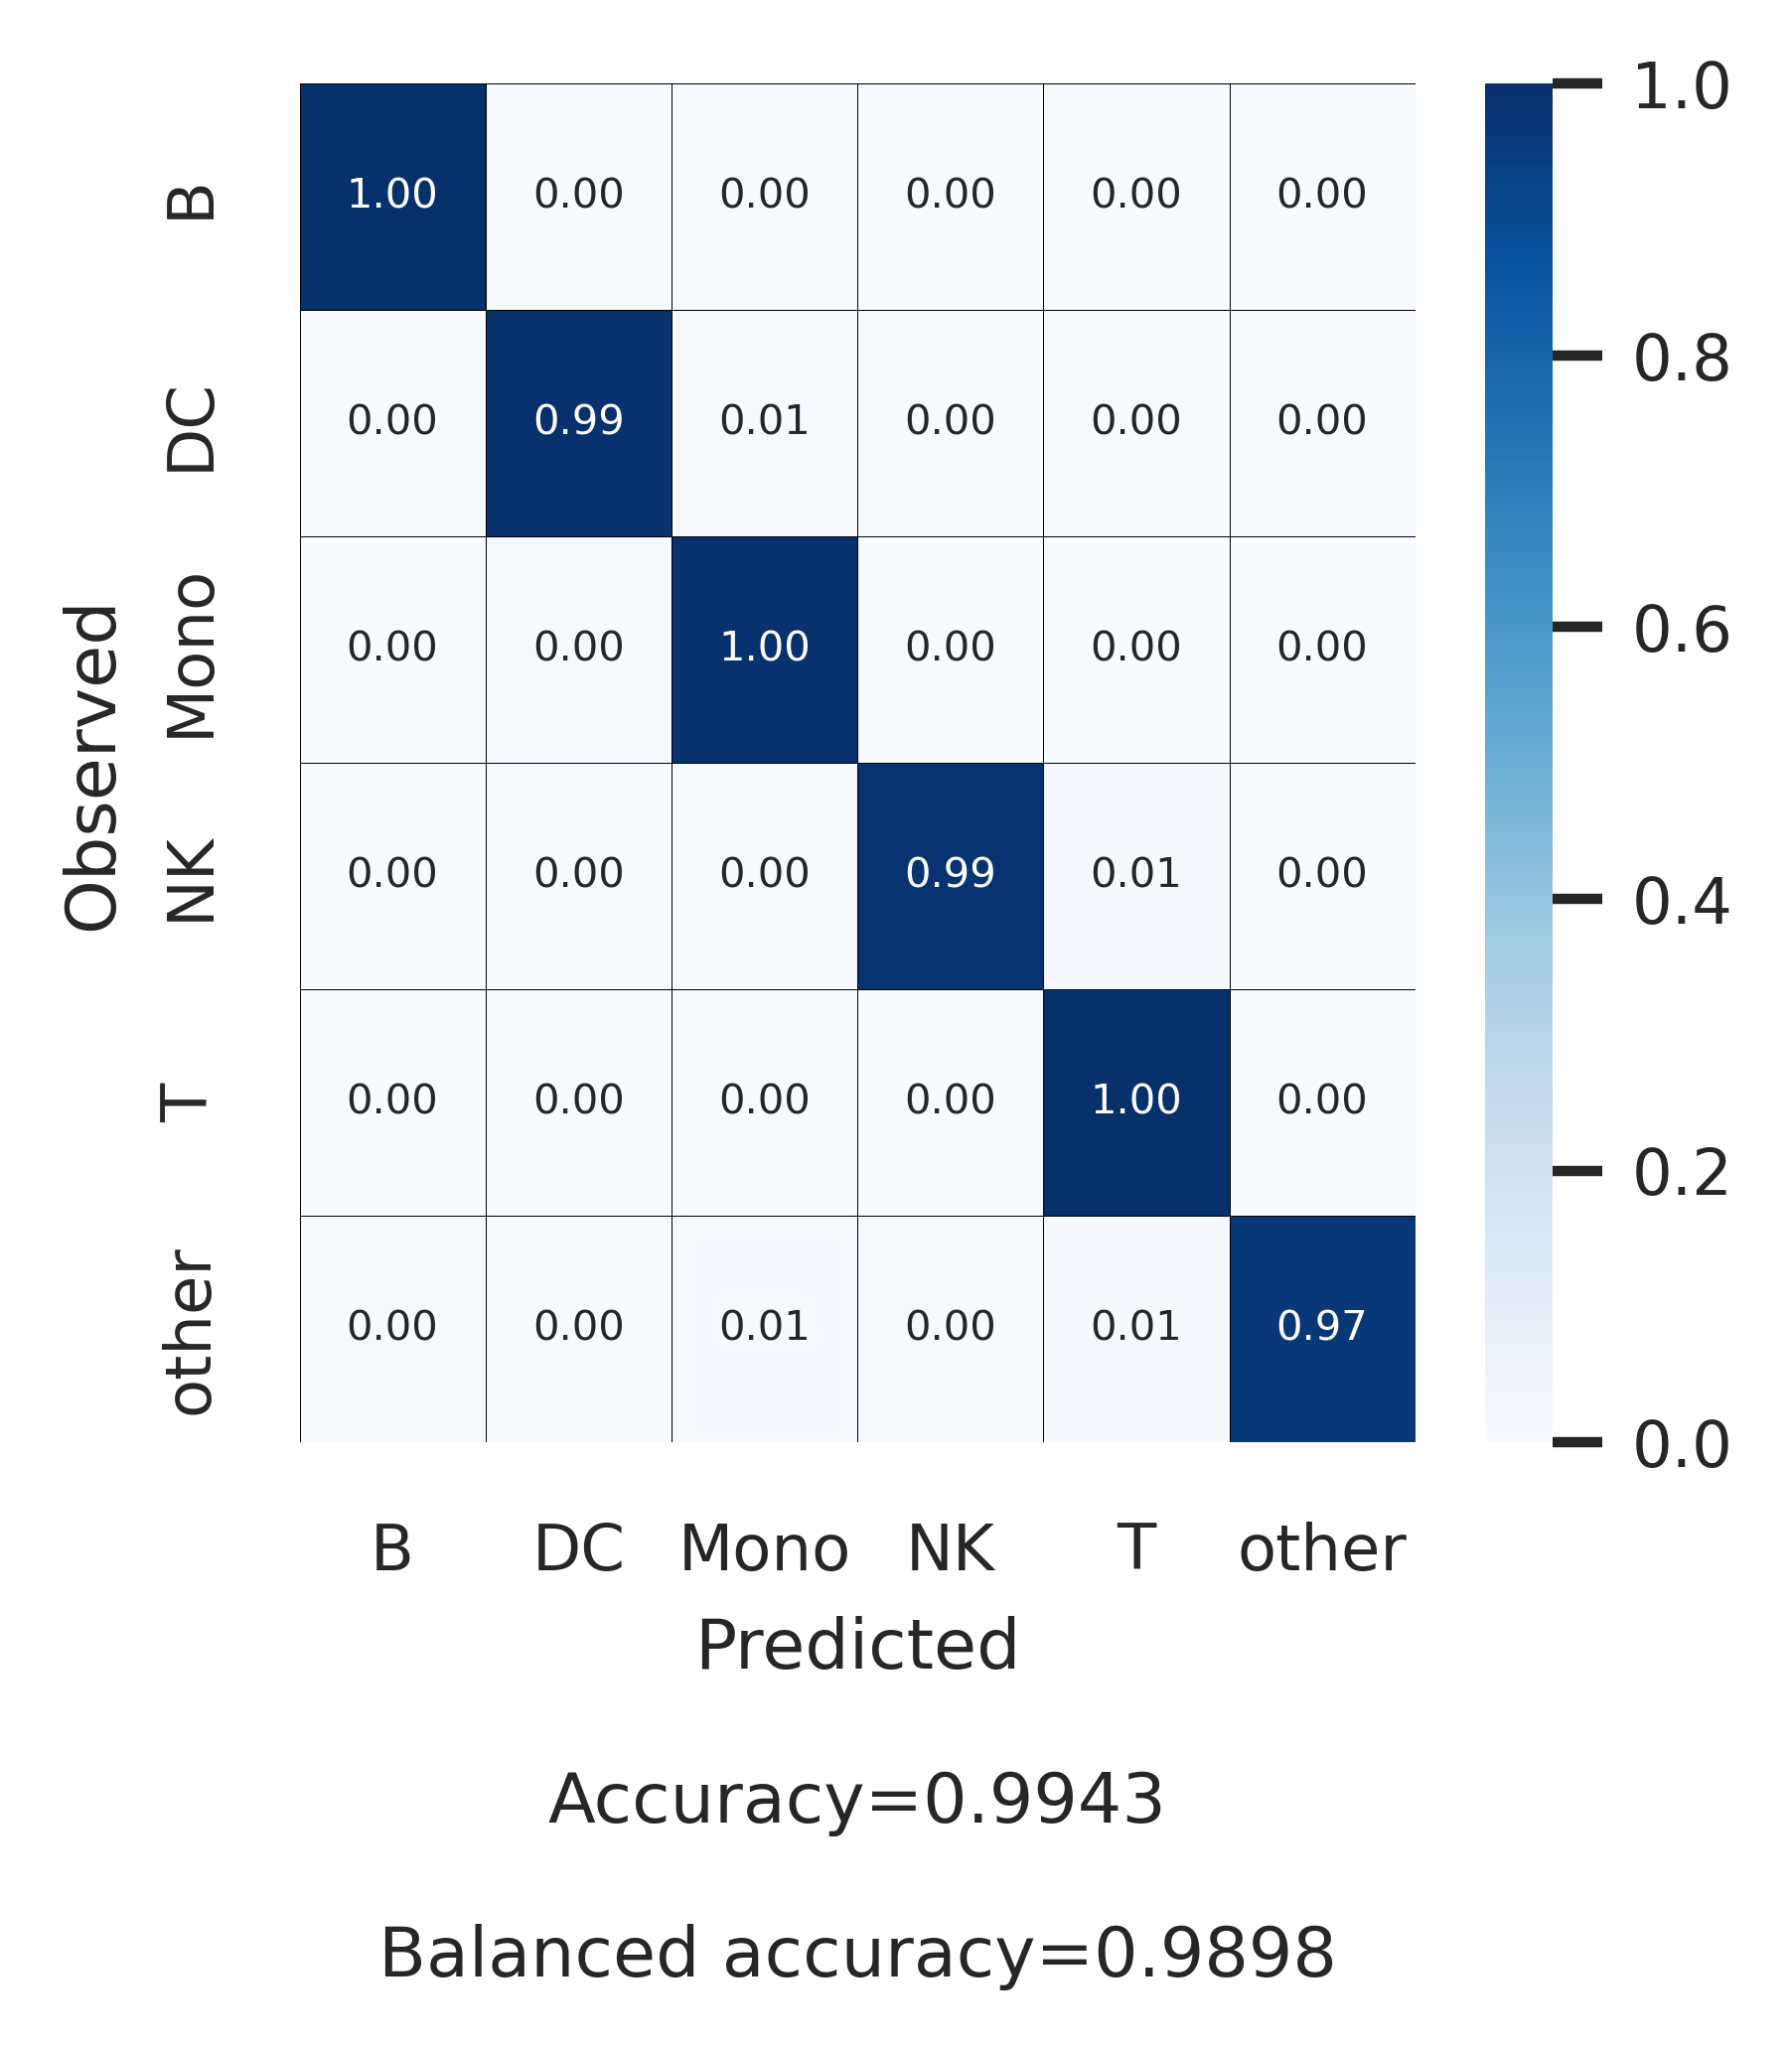

In [11]:
# Confusion matrix
sns.set(font_scale=0.7)
plt.figure(figsize=(3, 3))
scparadise.scnoah.conf_matrix(adata_rna,
                              celltype='celltype_l1',
                              pred_celltype='pred_celltype_l1',
                              annot_kws={"size":5},
                              linewidths=0.1, linecolor='black',
                              fmt =  ".2f",
                              ndigits_metrics = 4,
                              vmin=0, vmax=1)
plt.savefig('celltype_l1_conf_matrix.png', bbox_inches="tight")

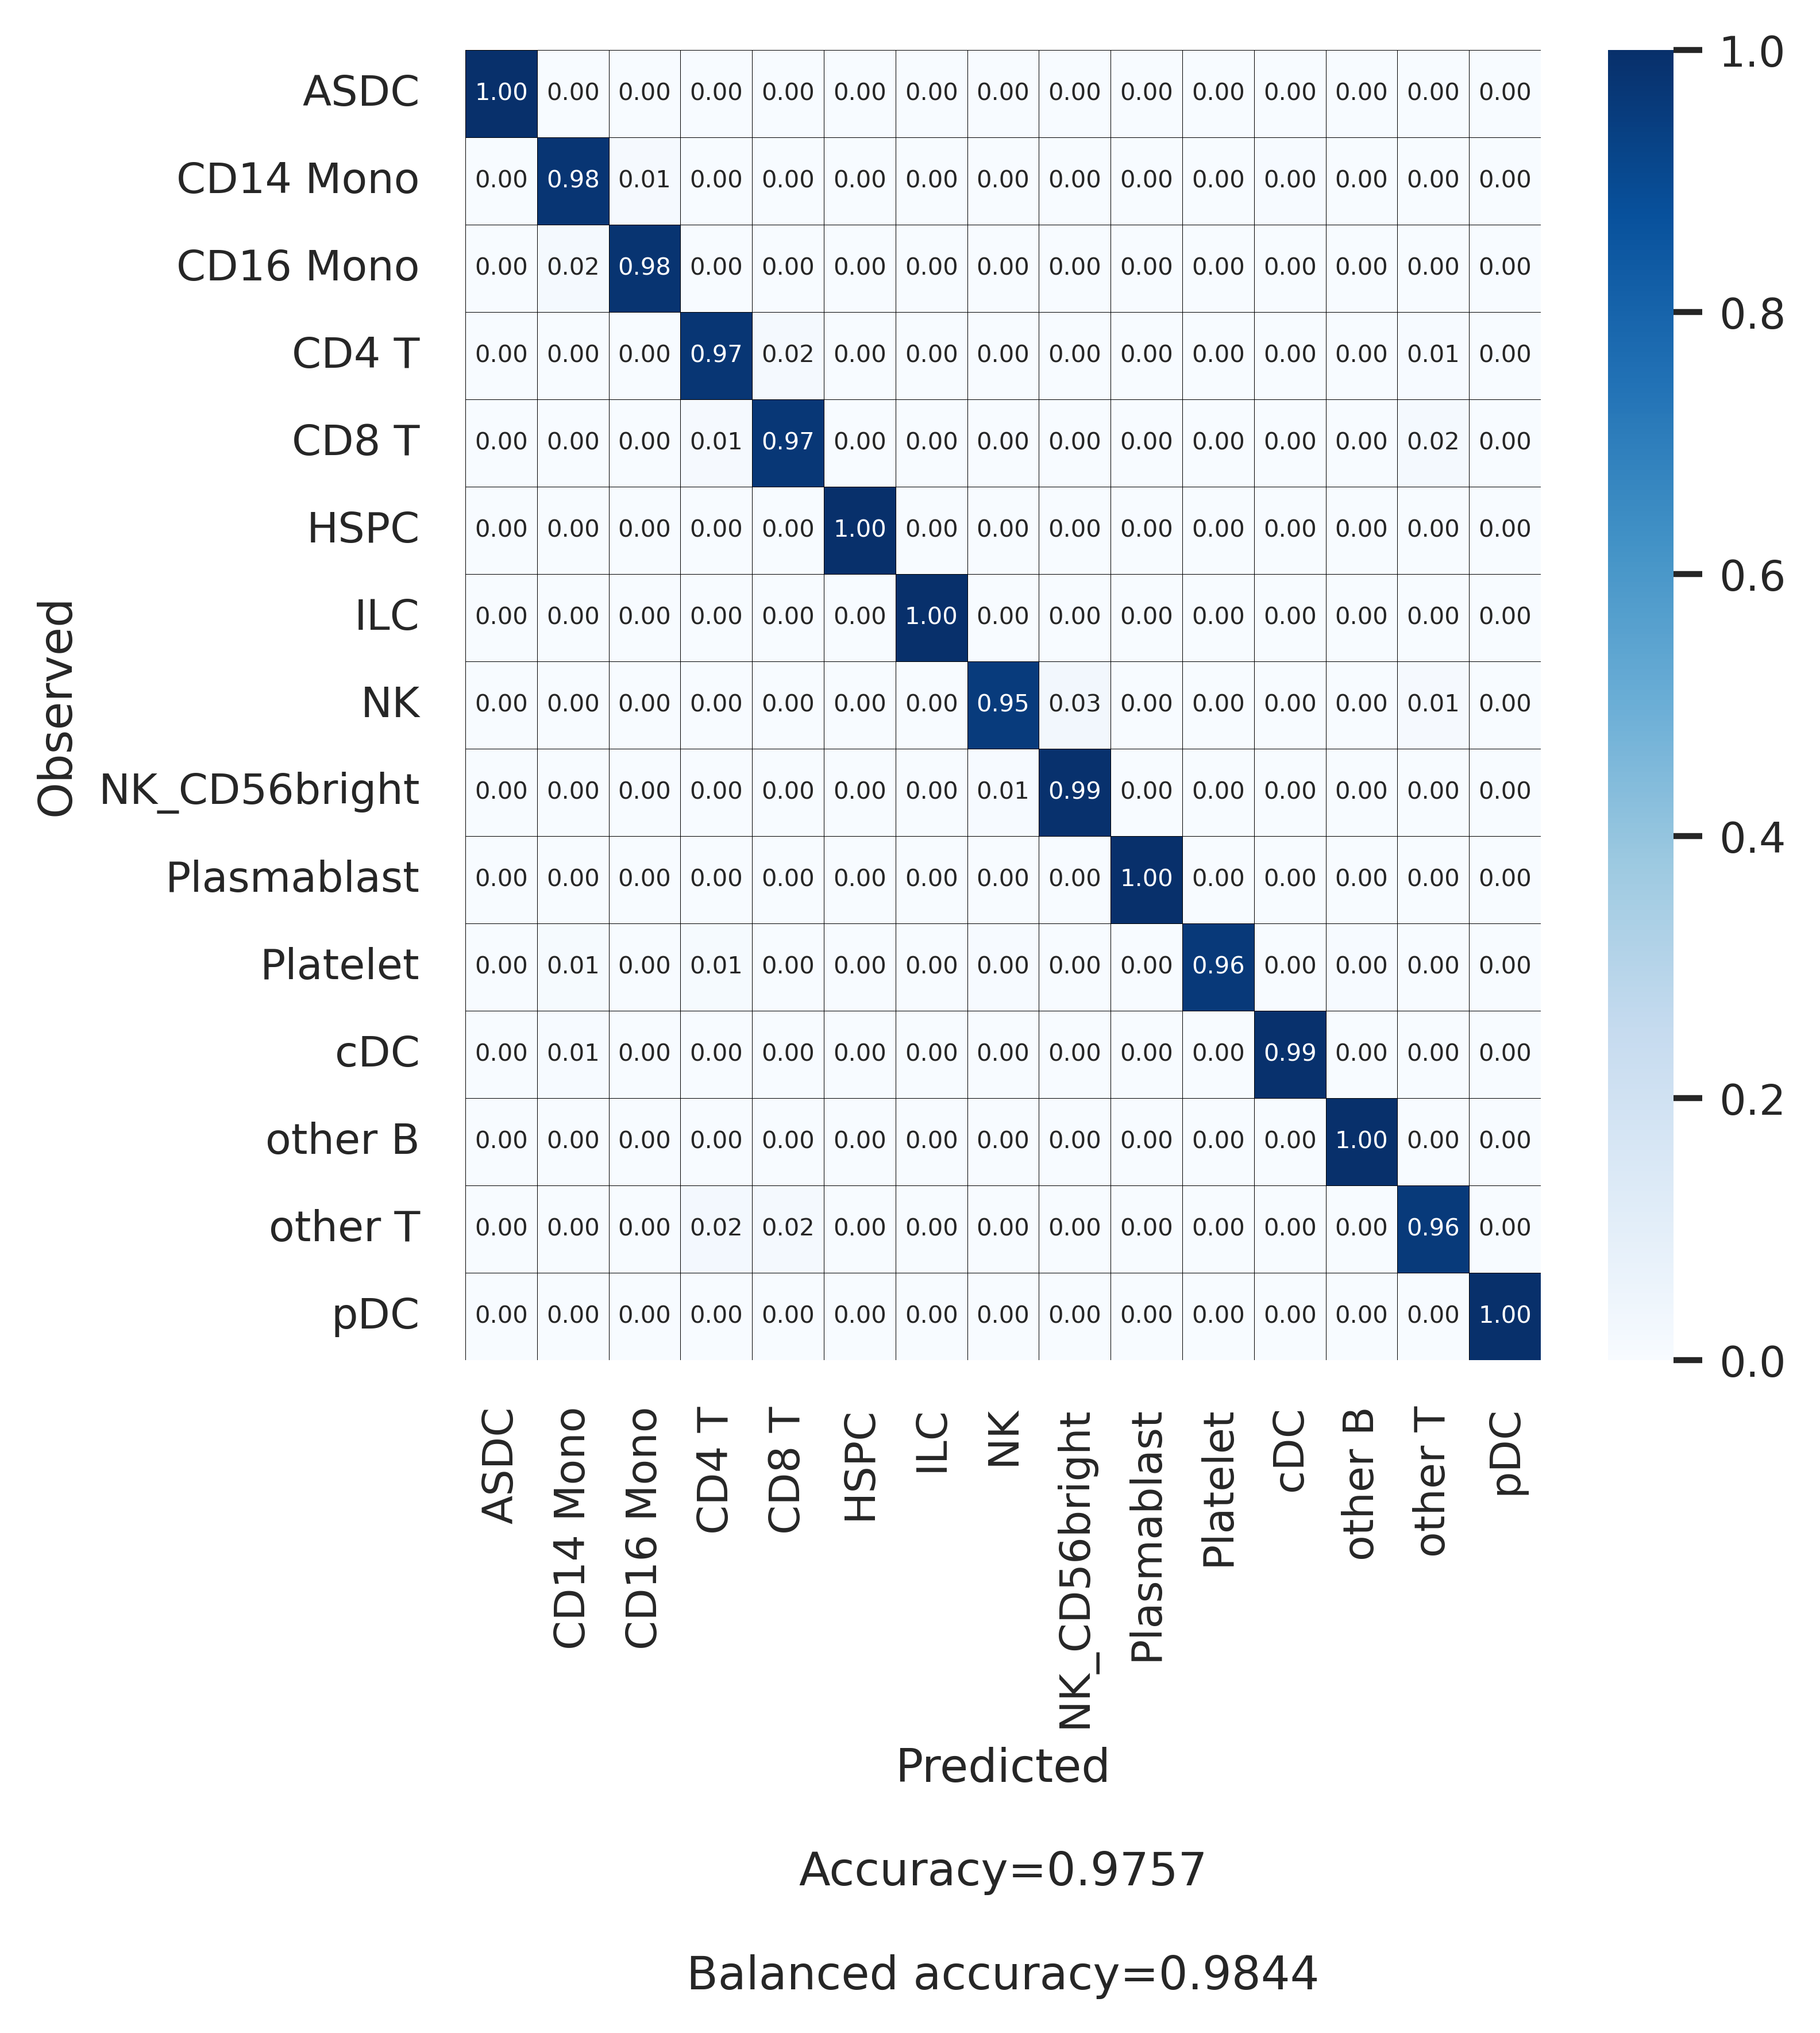

In [12]:
# Confusion matrix
sns.set(font_scale=0.8)
plt.figure(figsize=(5, 5))
scparadise.scnoah.conf_matrix(adata_rna,
                              celltype='celltype_l2',
                              pred_celltype='pred_celltype_l2',
                              annot_kws={"size":5},
                              linewidths=0.1, linecolor='black',
                              fmt =  ".2f",
                              ndigits_metrics = 4,
                              vmin=0, vmax=1)
plt.savefig('celltype_l2_conf_matrix.png', bbox_inches="tight")

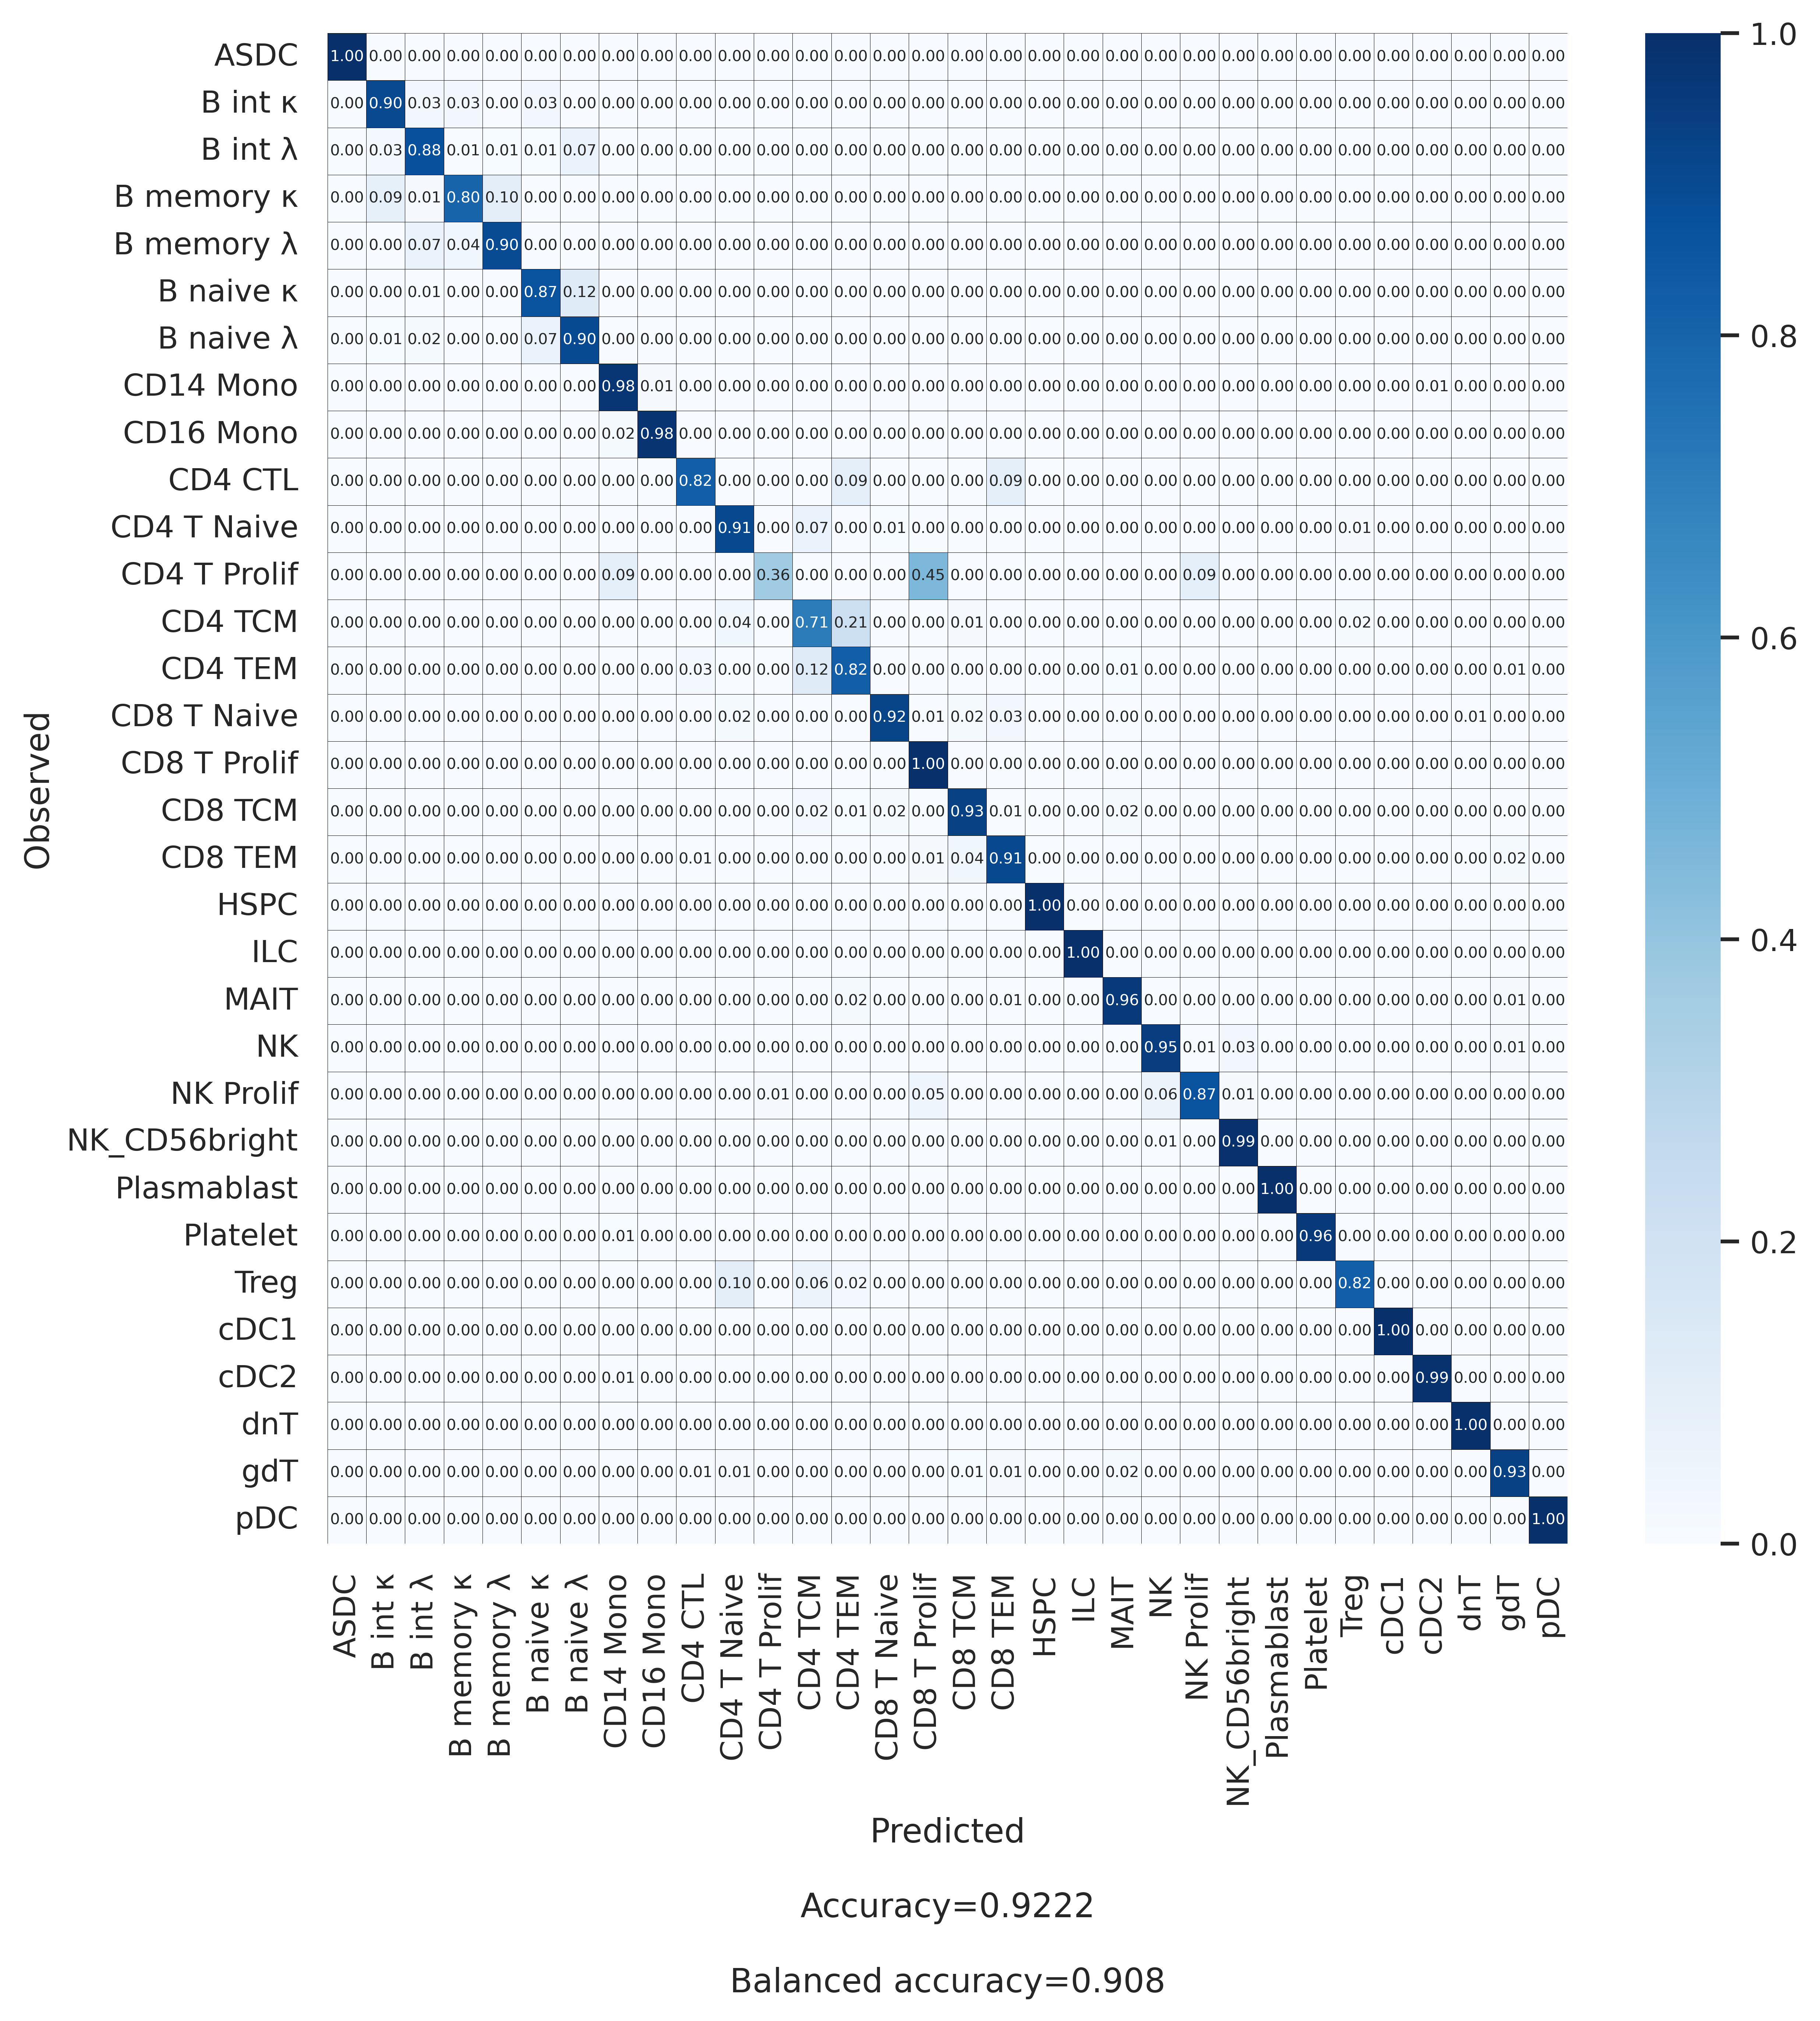

In [13]:
# Confusion matrix
sns.set(font_scale=0.9)
plt.figure(figsize=(9, 9))
scparadise.scnoah.conf_matrix(adata_rna,
                              celltype='celltype_l3',
                              pred_celltype='pred_celltype_l3',
                              annot_kws={"size":5},
                              linewidths=0.1, linecolor='black',
                              fmt =  ".2f",
                              ndigits_metrics = 4,
                              vmin=0, vmax=1)
plt.savefig('celltype_l3_conf_matrix.png', bbox_inches="tight")

# scEve prediction

In [4]:
adata_pred_adt = scparadise.sceve.predict(adata_rna, 
                                          path_model = '/mnt/c/Users/vadim/scRNA/scParadise/scEVE/PBMC/3p/scparadise/model_small_tuned/',
                                          return_mdata = False)

Successfully loaded list of genes used for training model

Successfully loaded list of proteins used for training model

Successfully loaded model



In [50]:
adata_pred_adt = scparadise.sceve.predict(adata_rna, 
                                          path_model = '/mnt/c/Users/vadim/scRNA/scParadise/scEVE/PBMC/3p/scparadise/model_small_tuned/',
                                          return_mdata = False)

Successfully loaded list of genes used for training model

Successfully loaded list of proteins used for training model

Successfully loaded model



In [51]:
# Reggression report of predicted surface proteins
df = scparadise.scnoah.report_reg(adata_prot = adata_adt, 
                                  adata_pred_prot = adata_pred_adt,
                                  save_report = True,
                                  ndigits = 3,
                                  report_name = 'report_regression.csv',
                                  save_path = '')
df

Successfully saved report



EVS r2_score   RMSE  \
score                                            0.418    0.414  0.285   
EVS/r2_score          higher value - better prediction                   
RMSE/MedianAE/MeanAE   lower value - better prediction                   

                     MedianAE MeanAE  
score                   0.179  0.217  
EVS/r2_score                          
RMSE/MedianAE/MeanAE

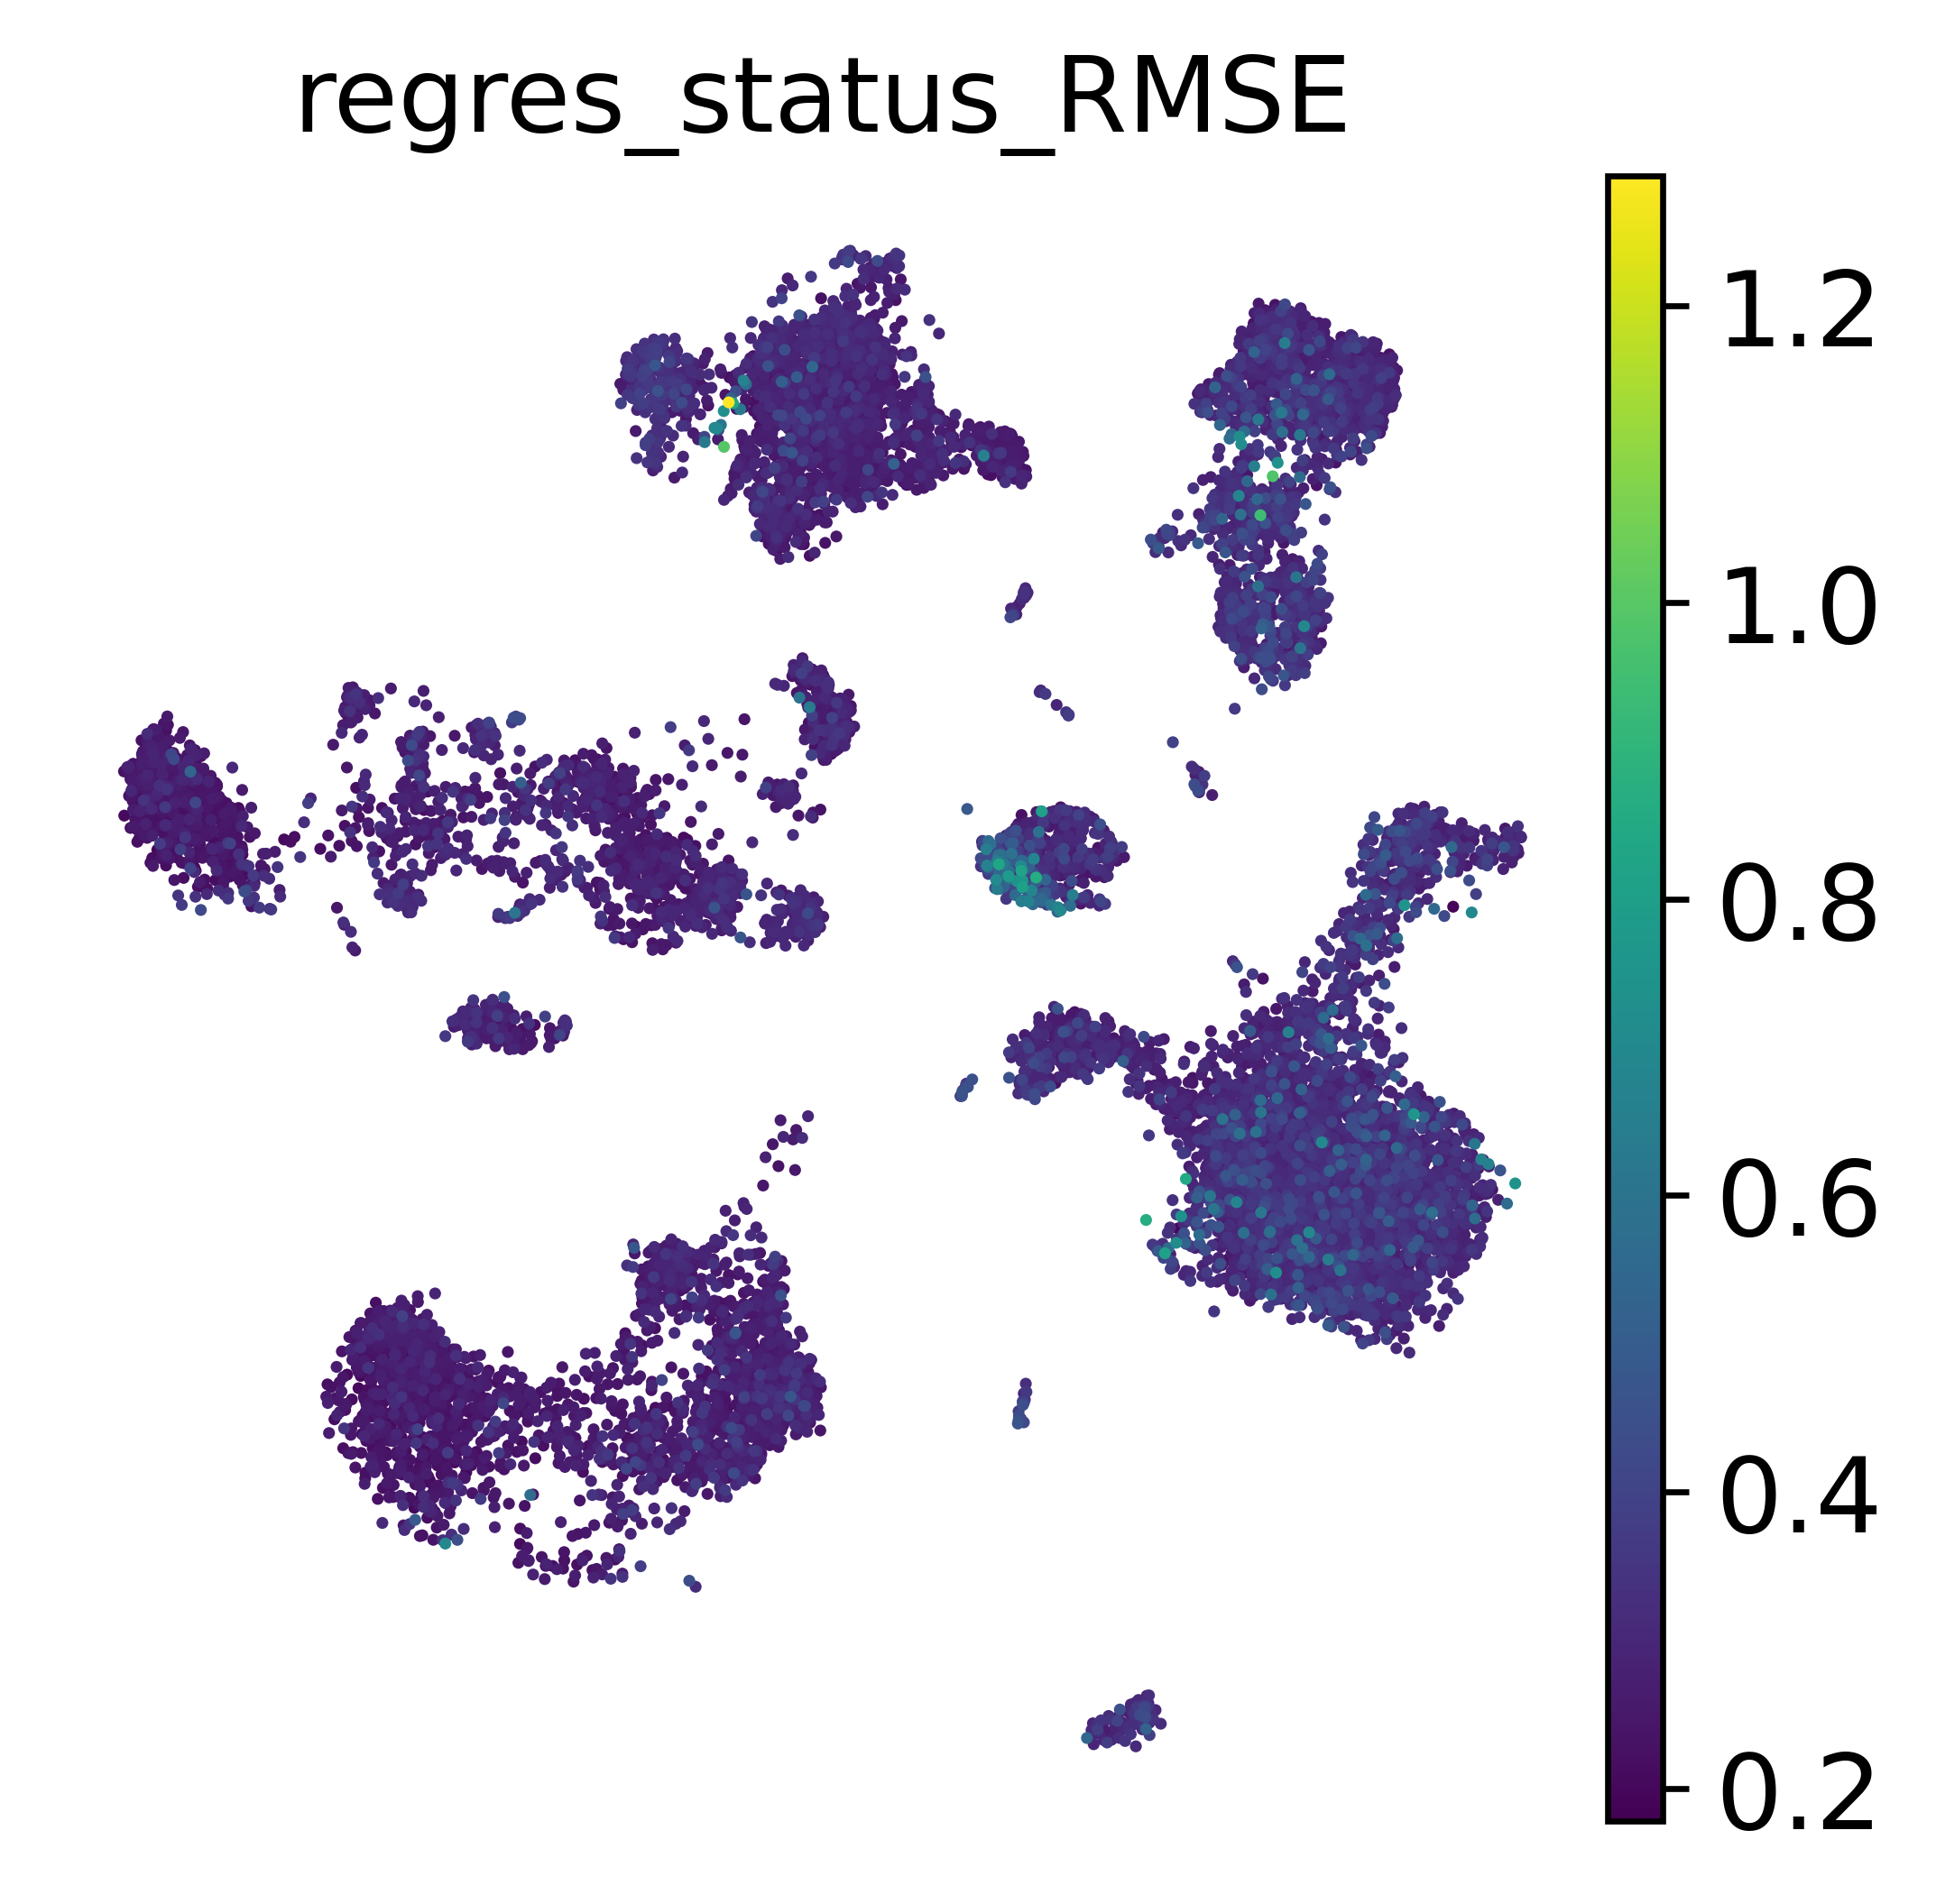

In [52]:
# Compute regression status
# Lower value - better result for error metrics (RMSE, MeanAE, MedianAE)
adata_pred_adt = scparadise.scnoah.regres_status(adata_prot = adata_adt, 
                                                  adata_pred_prot = adata_pred_adt,
                                                  metric = 'RMSE')
adata_pred_adt.obsm = adata_adt.obsm.copy()
# Visualize prediction status of cells
sc.pl.embedding(adata_pred_adt, 
                color=['regres_status_RMSE',
                      ], 
                basis = 'X_umap_wnn', 
                frameon = False,
                legend_fontsize = 10, 
                legend_fontoutline = 2, 
                wspace = 0.2,
                size = 10,
                ncols = 3,
                save = '_regres_status_RMSE.png'
               )

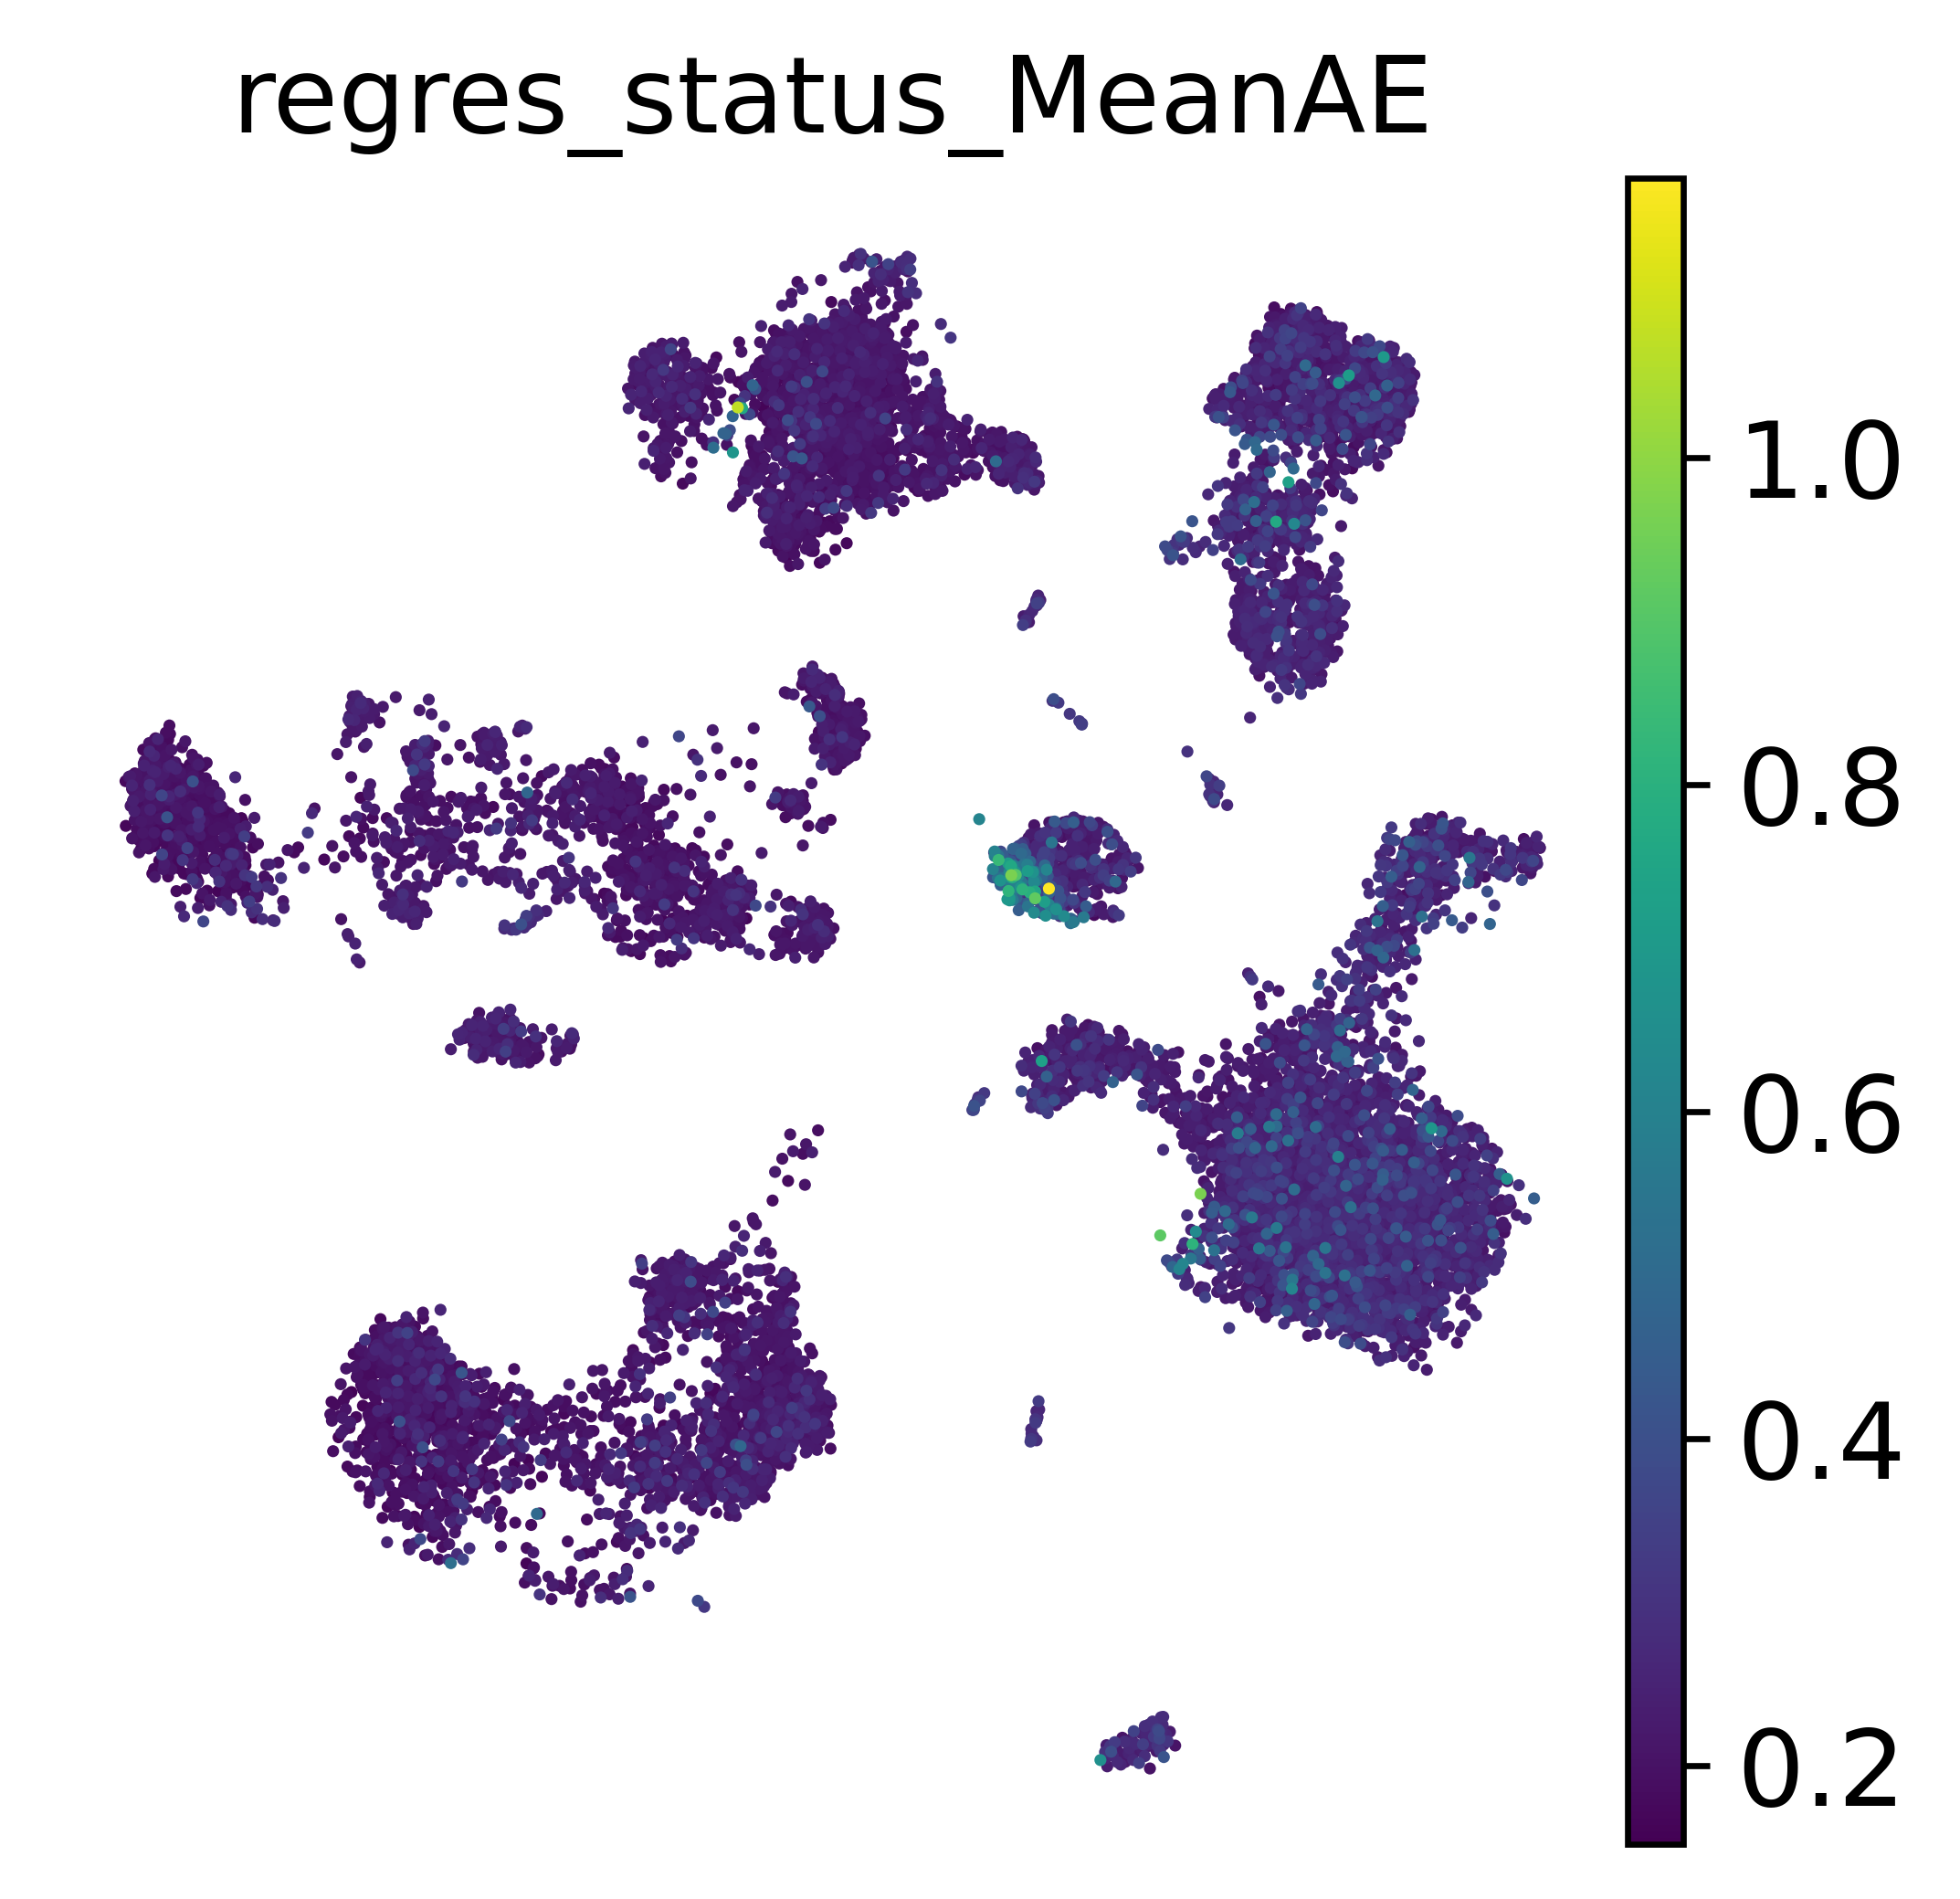

In [18]:
# Compute regression status
# Lower value - better result for error metrics (RMSE, MeanAE, MedianAE)
adata_pred_adt = scparadise.scnoah.regres_status(adata_prot = adata_adt, 
                                                  adata_pred_prot = adata_pred_adt,
                                                  metric = 'MeanAE')
adata_pred_adt.obsm = adata_adt.obsm.copy()
# Visualize prediction status of cells
sc.pl.embedding(adata_pred_adt, 
                color=['regres_status_MeanAE',
                      ], 
                basis = 'X_umap_wnn', 
                frameon = False,
                legend_fontsize = 10, 
                legend_fontoutline = 2, 
                wspace = 0.2,
                size = 10,
                ncols = 3,
                save = '_regres_status_MeanAE.png'
               )

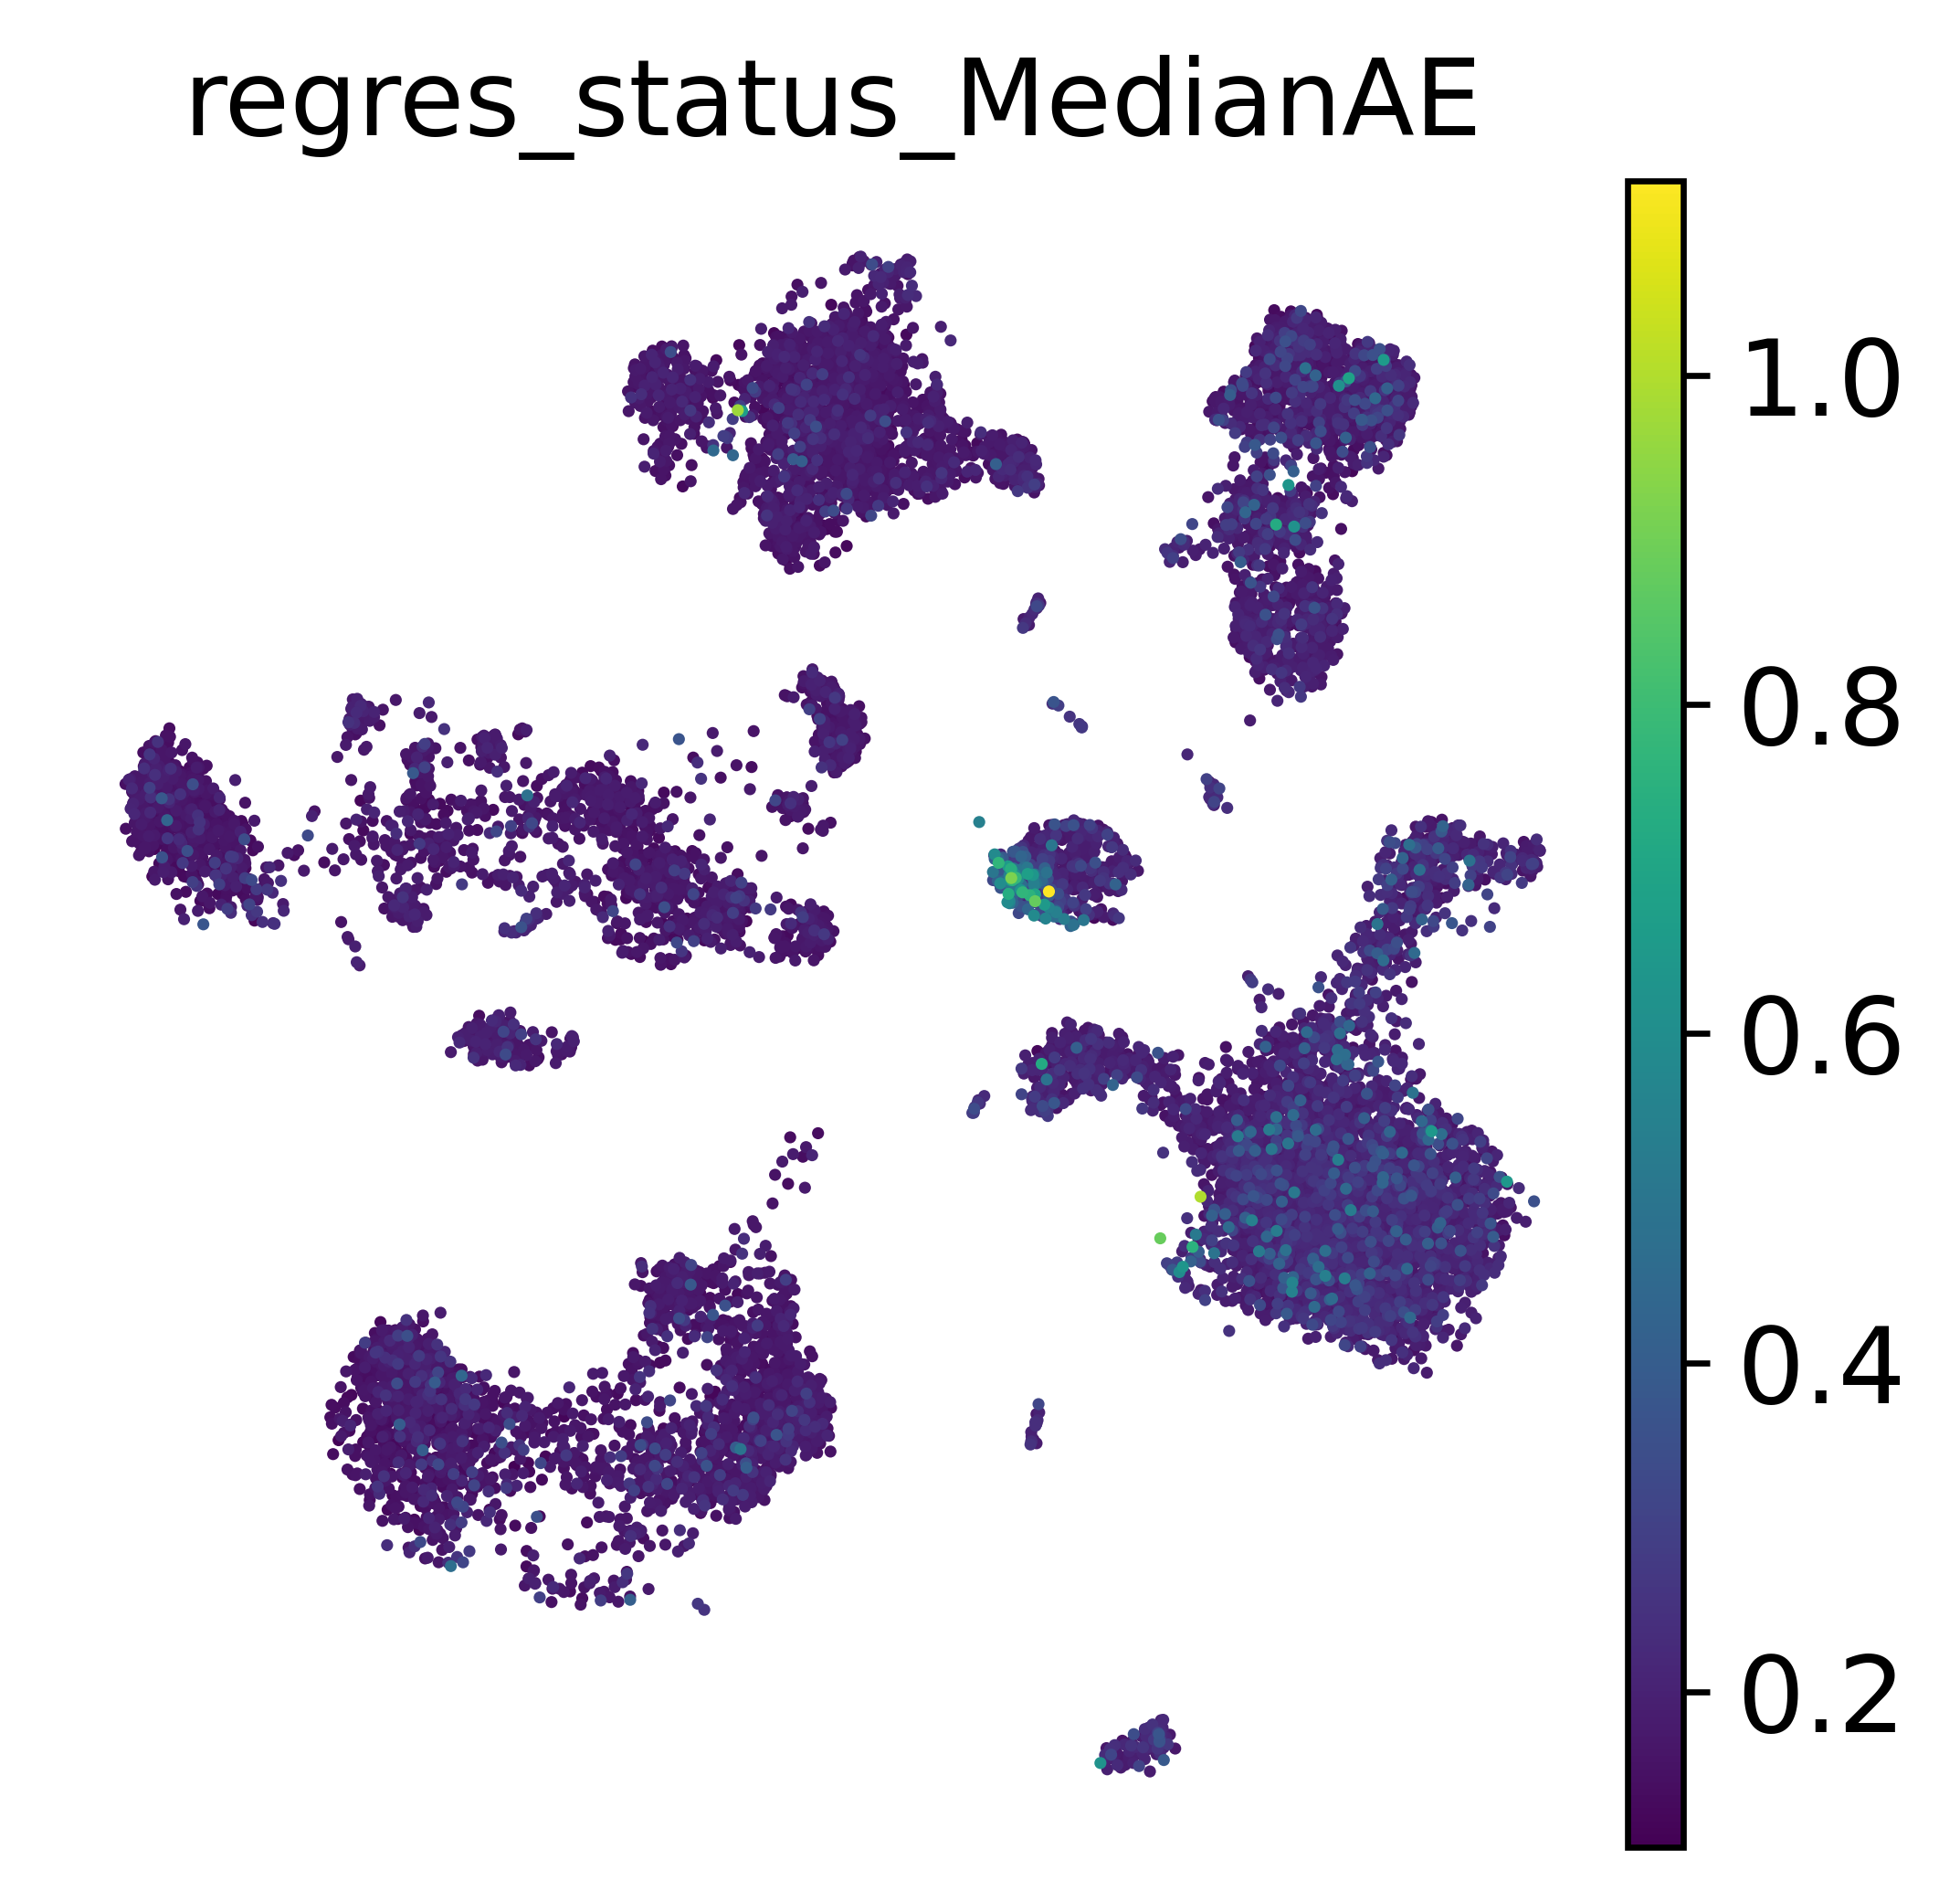

In [19]:
# Compute regression status
# Lower value - better result for error metrics (RMSE, MeanAE, MedianAE)
adata_pred_adt = scparadise.scnoah.regres_status(adata_prot = adata_adt, 
                                                  adata_pred_prot = adata_pred_adt,
                                                  metric = 'MedianAE')
adata_pred_adt.obsm = adata_adt.obsm.copy()
# Visualize prediction status of cells
sc.pl.embedding(adata_pred_adt, 
                color=['regres_status_MedianAE',
                      ], 
                basis = 'X_umap_wnn', 
                frameon = False,
                legend_fontsize = 10, 
                legend_fontoutline = 2, 
                wspace = 0.2,
                size = 10,
                ncols = 3,
                save = '_regres_status_MedianAE.png'
               )

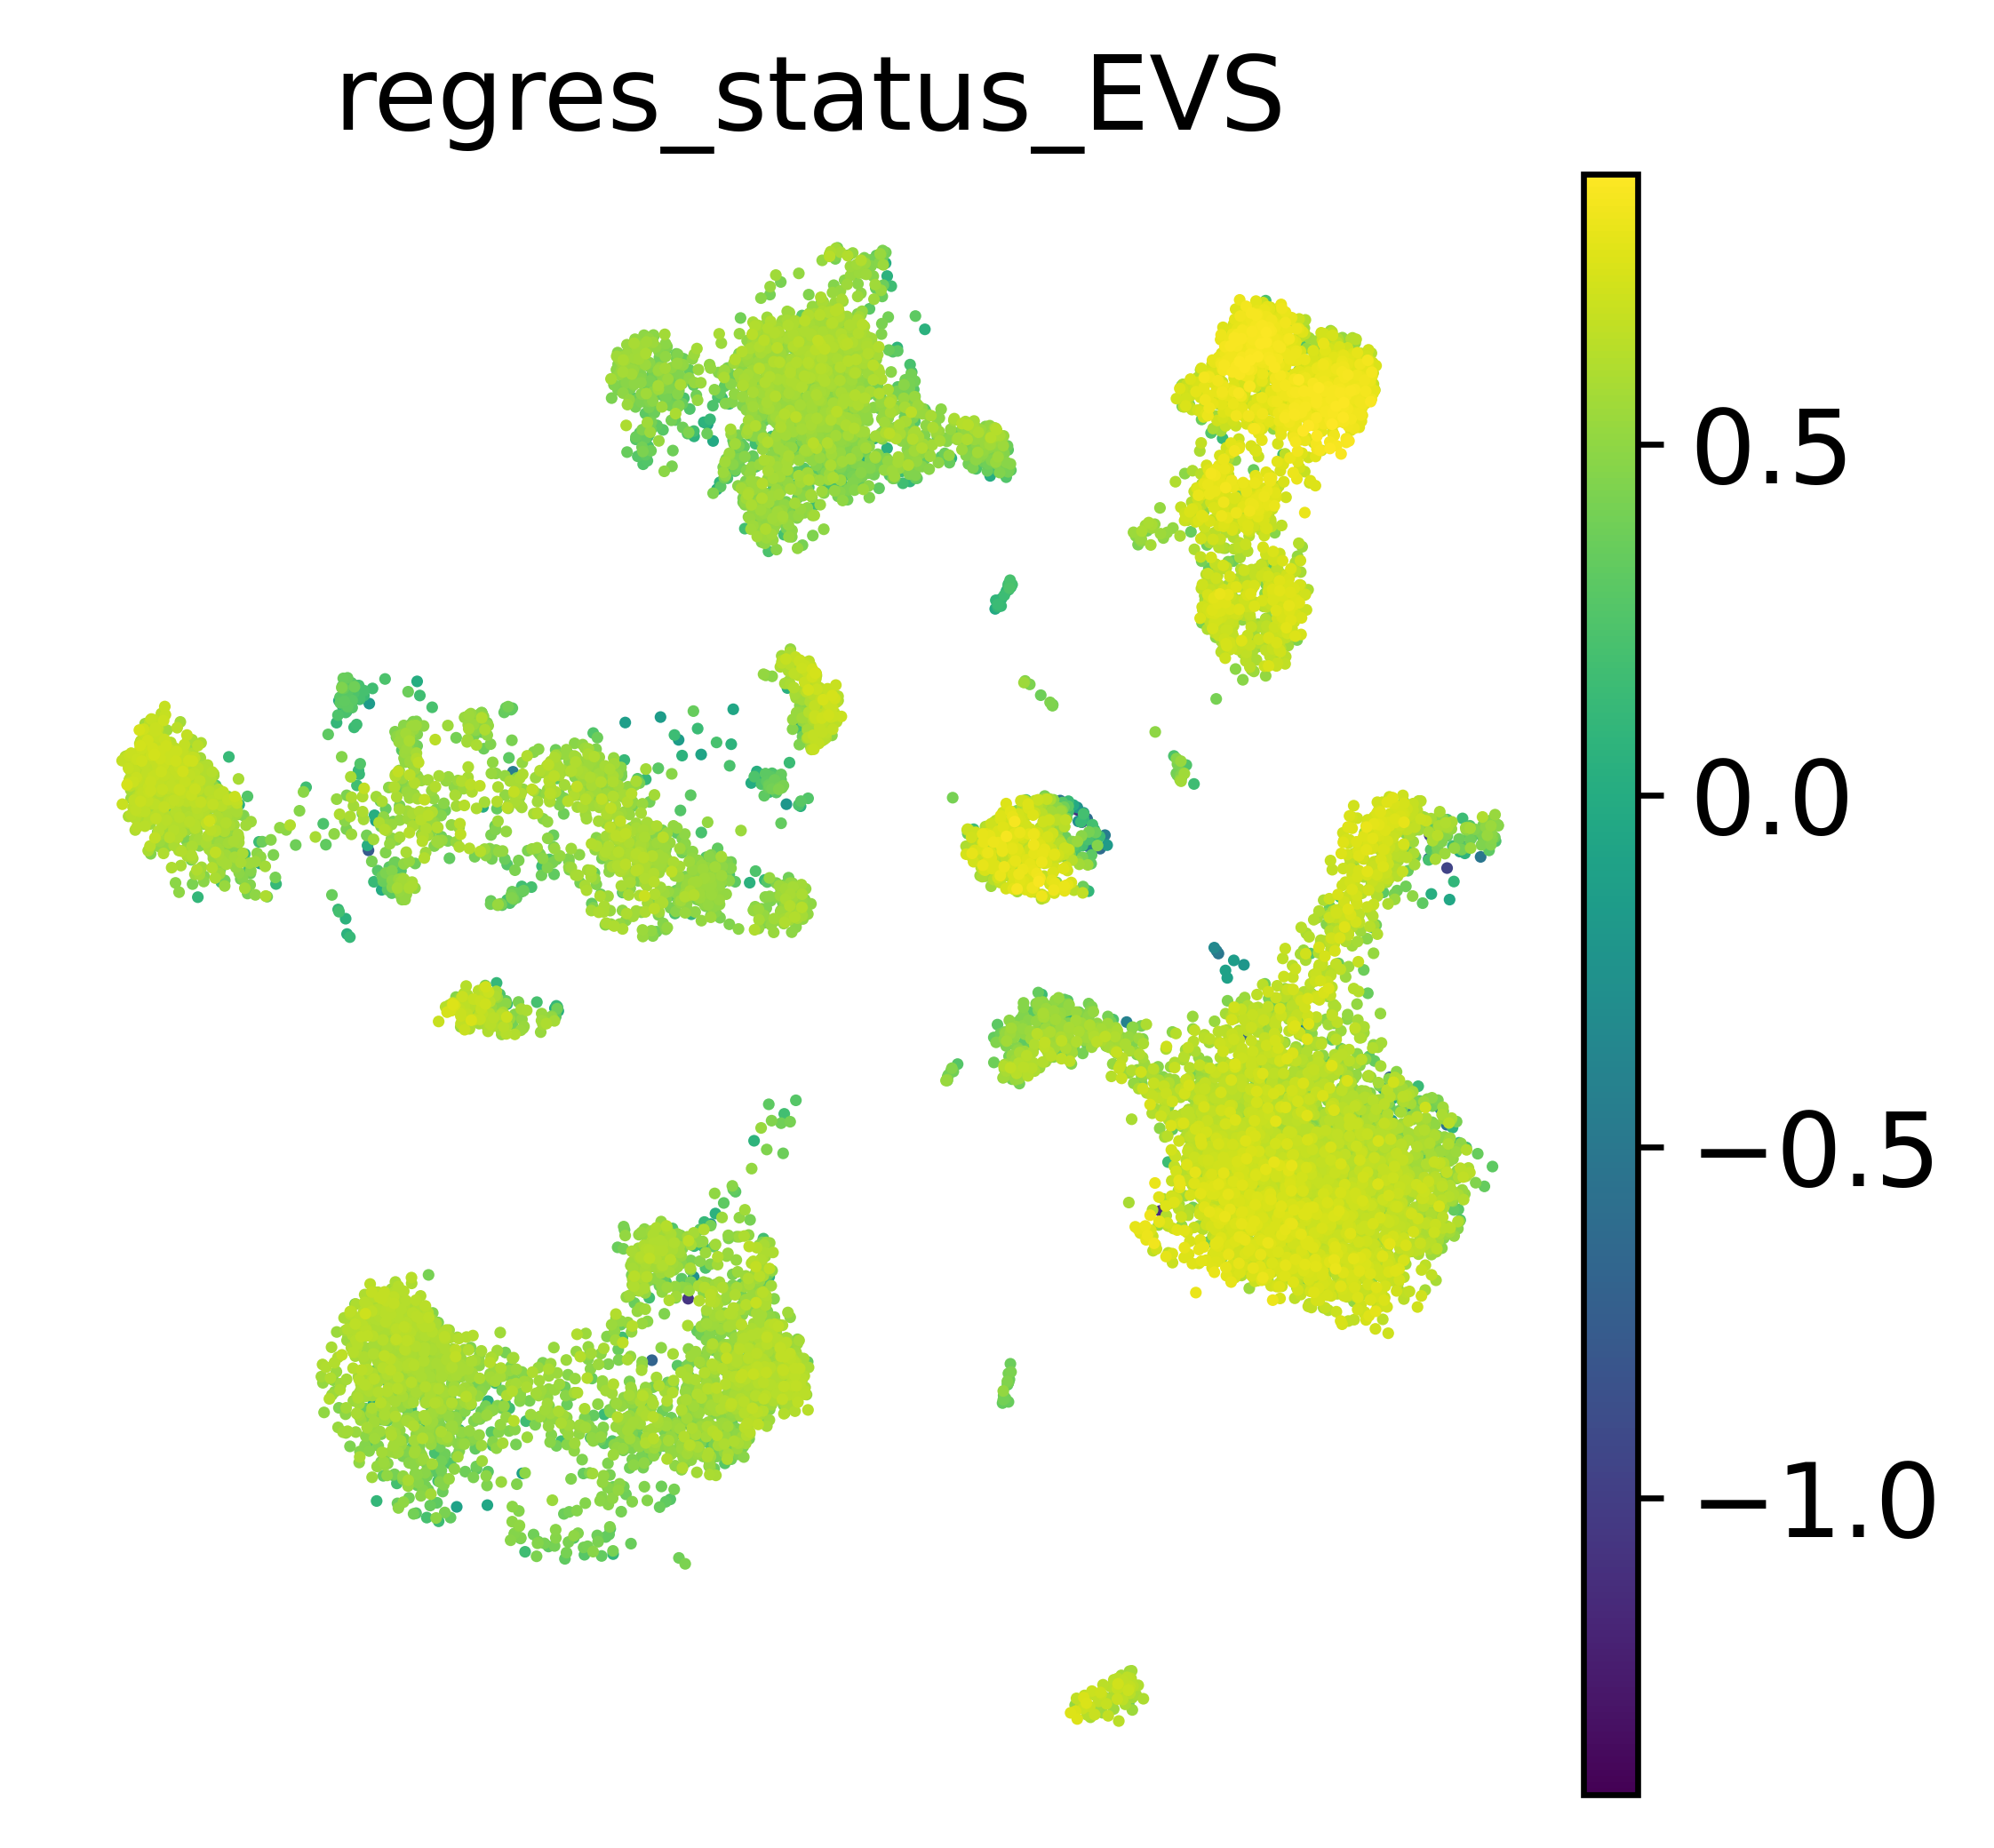

In [20]:
# Compute regression status
# Higher value - better result for R2-score, EVS
adata_pred_adt = scparadise.scnoah.regres_status(adata_prot = adata_adt, 
                                                  adata_pred_prot = adata_pred_adt,
                                                  metric = 'EVS')
adata_pred_adt.obsm = adata_adt.obsm.copy()
# Visualize prediction status of cells
sc.pl.embedding(adata_pred_adt, 
                color=['regres_status_EVS',
                      ], 
                basis = 'X_umap_wnn', 
                frameon = False,
                legend_fontsize = 10, 
                legend_fontoutline = 2, 
                wspace = 0.2,
                size = 10,
                ncols = 3,
                save = '_regres_status_EVS.png'
               )

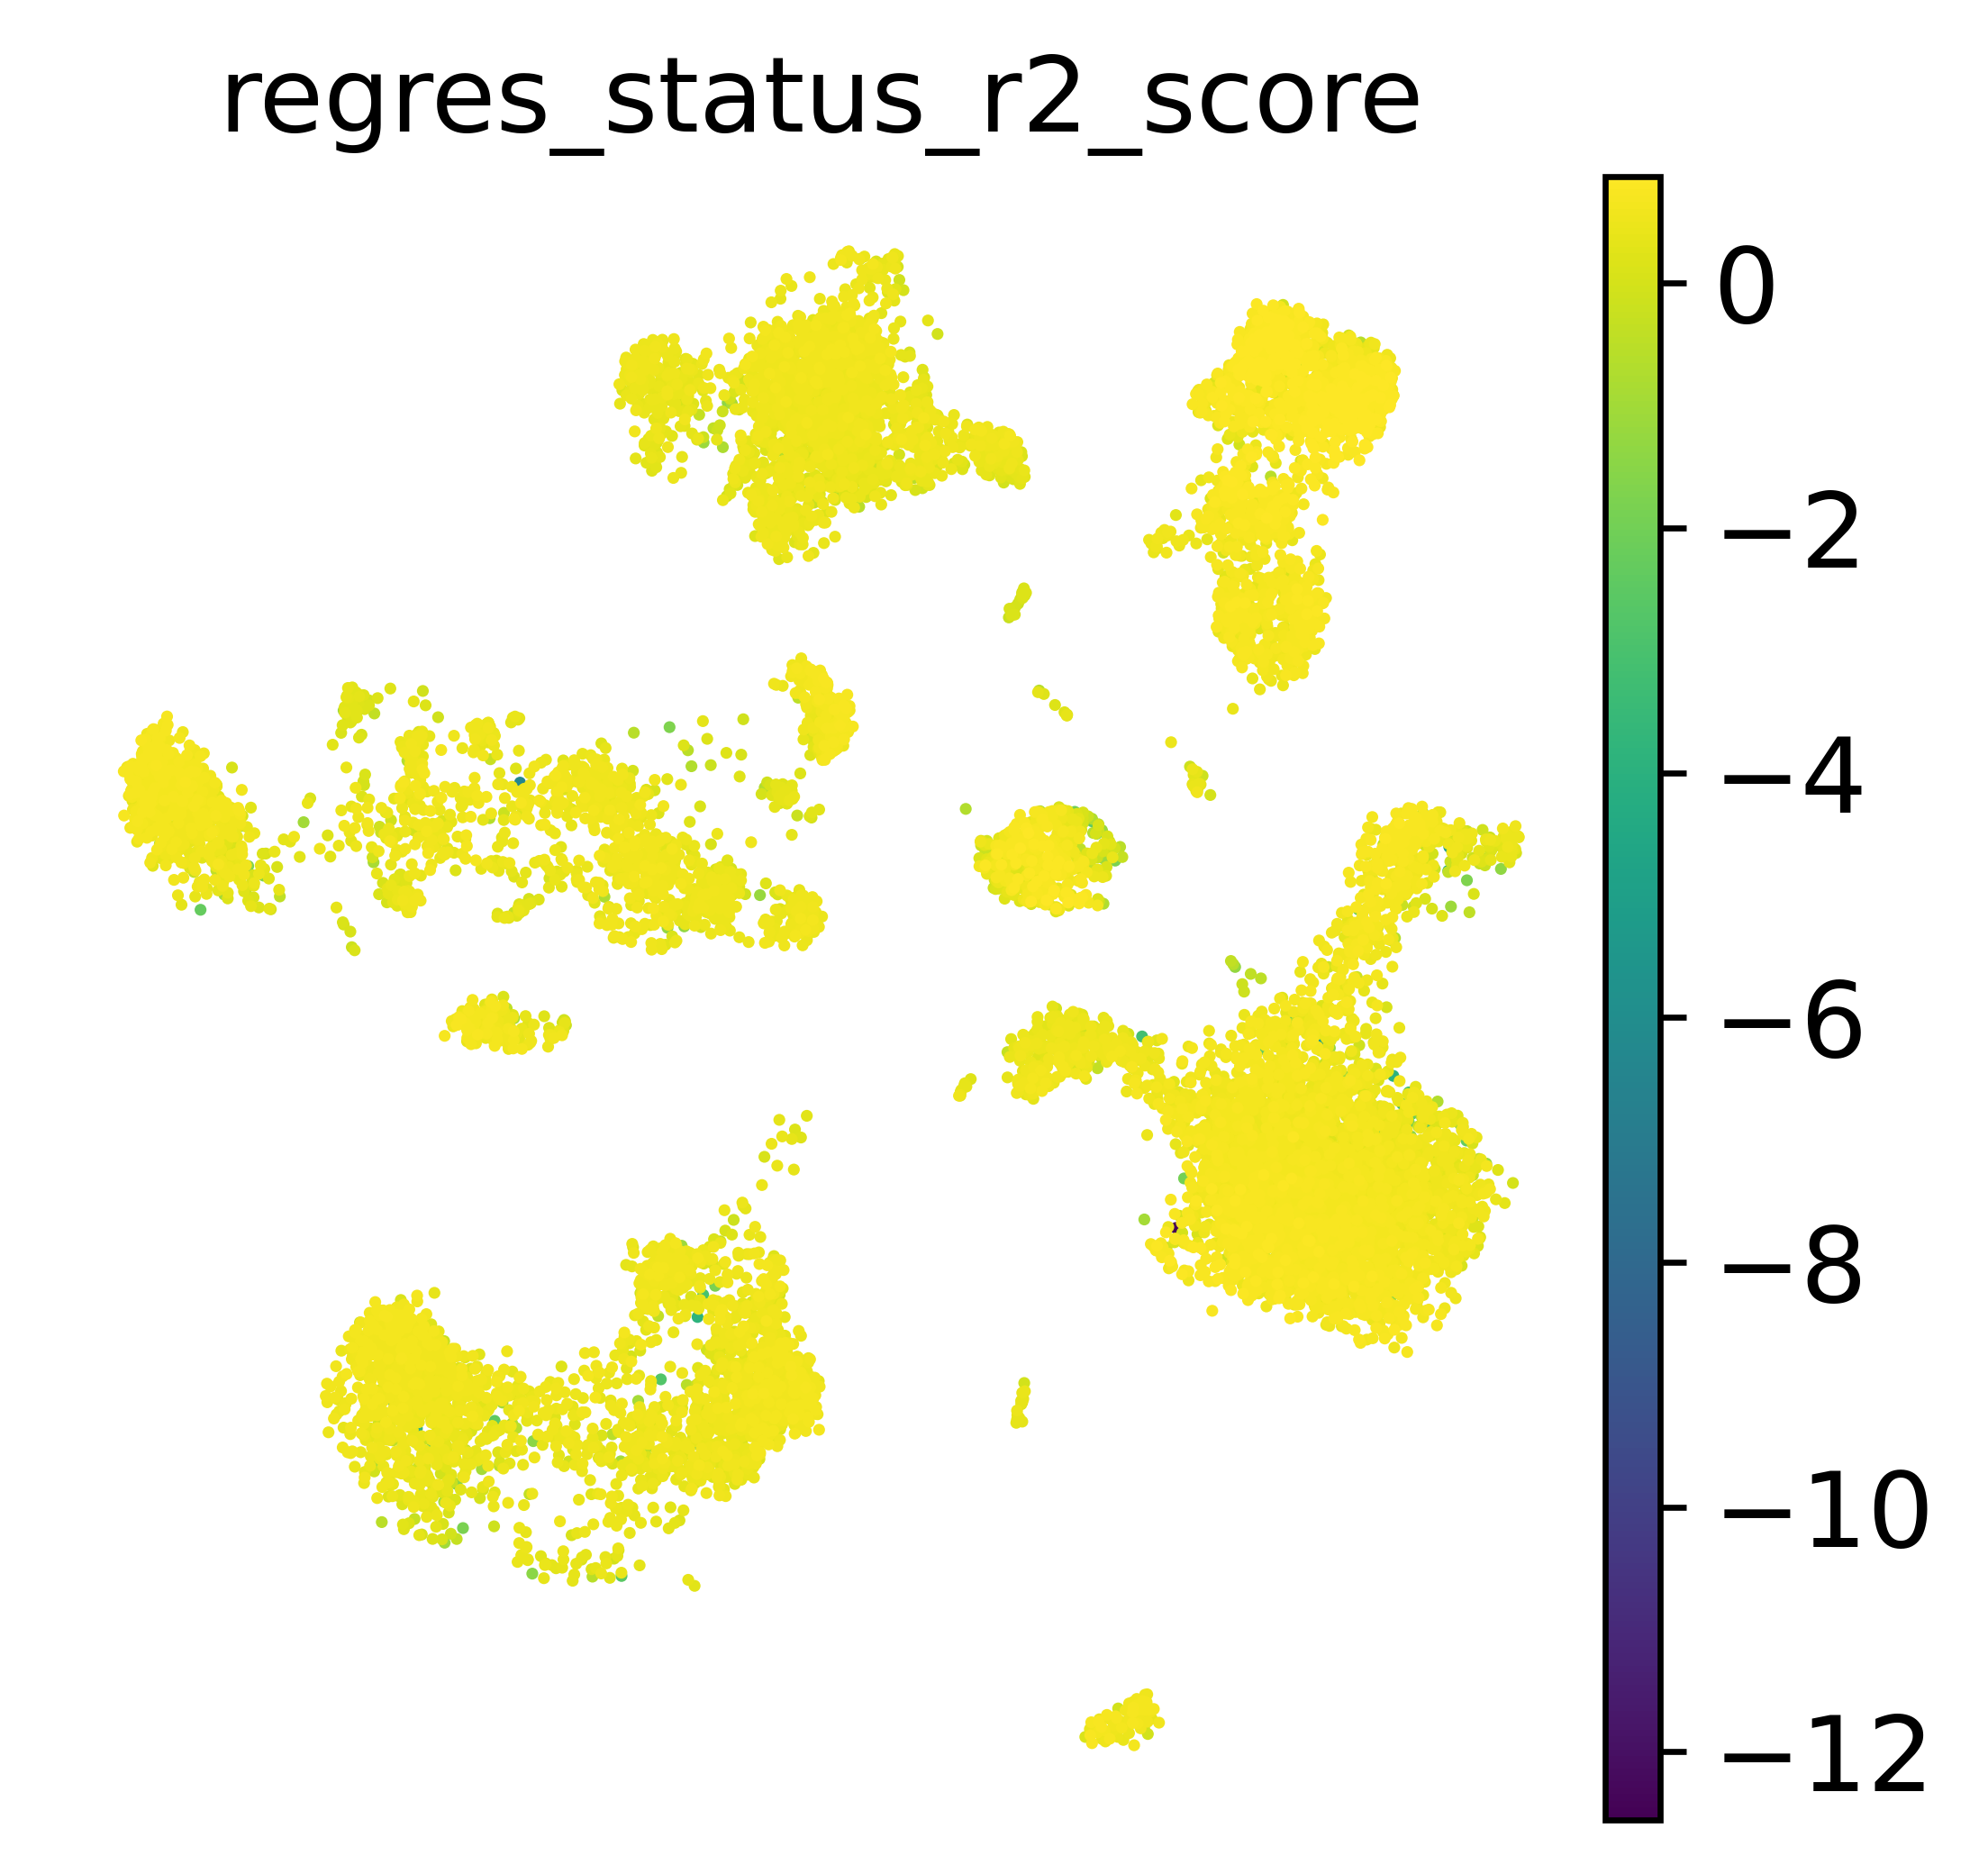

In [21]:
# Compute regression status
# Higher value - better result for R2-score, EVS
adata_pred_adt = scparadise.scnoah.regres_status(adata_prot = adata_adt, 
                                                  adata_pred_prot = adata_pred_adt,
                                                  metric = 'r2_score')
adata_pred_adt.obsm = adata_adt.obsm.copy()
# Visualize prediction status of cells
sc.pl.embedding(adata_pred_adt, 
                color=['regres_status_r2_score',
                      ], 
                basis = 'X_umap_wnn', 
                frameon = False,
                legend_fontsize = 10, 
                legend_fontoutline = 2, 
                wspace = 0.2,
                size = 10,
                ncols = 3,
                save = '_regres_status_r2_score.png'
               )

In [22]:
pip list

Package                       Version
----------------------------- --------------
absl-py                       2.1.0
adjustText                    1.2.0
aiohappyeyeballs              2.3.6
aiohttp                       3.10.3
aiosignal                     1.3.1
alabaster                     1.0.0
alembic                       1.13.2
anndata                       0.10.8
annoy                         1.17.3
anyio                         4.4.0
appdirs                       1.4.4
argon2-cffi                   23.1.0
argon2-cffi-bindings          21.2.0
array_api_compat              1.8
arrow                         1.3.0
asttokens                     2.4.1
async-lru                     2.0.4
attrs                         24.2.0
Babel                         2.14.0
beautifulsoup4                4.12.3
bleach                        6.1.0
bokeh                         3.4.2
branca                        0.7.2
Brotli                        1.1.0
cached-property               1.5.2
cachetools